# Avocado Project:
**Submitted by** Chandrashekar k v Batch no:1836.

## STATEMENT: 
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

* The following are the relevant columns in the dataset


* **Date** - The date of the observation
* **AveragePrice** - the average price of a single avocado
* **type** - conventional or organic
* **year** - the year
* **Region** - the city or region of the observation
* **Total Volume** - Total number of avocados sold
* **4046** - Total number of avocados with PLU 4046 sold
* **4225** - Total number of avocados with PLU 4225 sold
* **4770** - Total number of avocados with PLU 4770 sold

## Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

## Importing dataset

In [75]:
# Reading the csv file from dataset
df = pd.read_csv('avacado.csv')
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

The dataset having 14 columns which contains both features and target variable. Here  "region" is the target variable and it is a classification problem.

As seen in the dataset the column Unnamed is taken on the basis of index purpose which does not play any important role in the finding the region of avocado, so I am dropping this column.

In [76]:
# Dropping the irrelevant column Unnamed:0
df.drop("Unnamed: 0",axis=1, inplace=True)

In [77]:
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

# Exploratory Data Analysis (EDA)

In [78]:
df.shape

(18249, 13)

dataset contains 18249 rows and 13 columns.

In [79]:
# Checking the types of the dataset
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

dataset contains object type, float and integer type data.

The Date column showing object data type which means python is not able to understand the type of Date. So let's do feature engineering to split Date into Month and Day.

## Feature engineering

In [80]:
# Changing date column from object type to Date Type
df['Date']=pd.to_datetime(df['Date'])

In [81]:
# Checking the type of data again
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [82]:
df["Month"] = df["Date"].dt.month

In [83]:
df["Day"] = df["Date"].dt.day

Now we have separated Month and Day from Date column and now the column Date is of no use, so let's drop it.

In [84]:
df.drop("Date",axis=1,inplace=True)

In [85]:
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [86]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  Month         18249 non-null  int64  
 13  Day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


This gives the brief information about the dataset which includes indexing type, column type, no-null values and memory usage.

In [87]:
# Checking number of unique values in each column
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Month              12
Day                31
dtype: int64

These are the number of unique values present in each columns.

In [88]:
# Checking null values in the dataset
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

There is no null values present in the Dataset.

<AxesSubplot:>

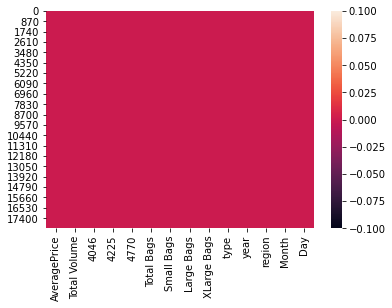

In [89]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

In [90]:
# Checking how many columns are there in the dataset
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [91]:
# Checking the uniqueness of target variable
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [92]:
# List of values in the target variable
df["region"].value_counts()

Louisville             338
CincinnatiDayton       338
Nashville              338
NewYork                338
NewOrleansMobile       338
Orlando                338
Charlotte              338
Plains                 338
Southeast              338
Syracuse               338
StLouis                338
Boston                 338
Midsouth               338
TotalUS                338
Philadelphia           338
HartfordSpringfield    338
Denver                 338
Pittsburgh             338
Detroit                338
Northeast              338
SanDiego               338
Atlanta                338
West                   338
SouthCarolina          338
Boise                  338
Tampa                  338
Seattle                338
DallasFtWorth          338
Jacksonville           338
BuffaloRochester       338
Roanoke                338
GreatLakes             338
LosAngeles             338
SouthCentral           338
MiamiFtLauderdale      338
RaleighGreensboro      338
PhoenixTucson          338
P

In [93]:
# Checking wheather the dataset contains any space
df.loc[df['region']==" "]

Empty DataFrame
Columns: [AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region, Month, Day]
Index: []

So from the above observation we can say there are no spaces present in the dataset.

# Description of Dataset

In [94]:
# Statistical summary of dataset
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

              Month           Day  
count  18249.000000  18249.000000  
mean       6.177215     15.662612  
std        3.534130      8.776281  
min        1.000000      1.000000  
25%        3.000000      8.000000  
50%        6.000000     16.000000  
75%        9.000000     23.000000  
max       12.000000     31.000000

* The counts of all the columns are same which means there are no null values present in the dataset.
* The mean is greater than the median in most of the columns which means they are skewed to right.
* In some of the columns median is greater than the mean, hence they are skewed to left.

In [95]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


In [96]:
# checking for numirical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


# Data Visualization

## Univariate Analysis

conventional    9126
organic         9123
Name: type, dtype: int64


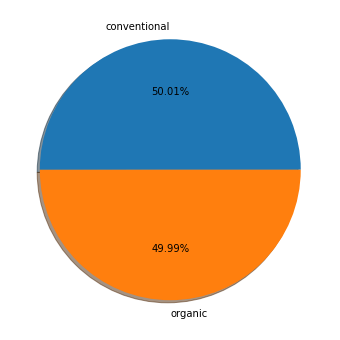

In [34]:
#Visualize the count of type of the avocado
print(df["type"].value_counts())
labels='conventional','organic'
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

We can observe both conventional and organic types of avocado are equal in counts. Which means half of the avocado products involves chemicals. Both types have equal demand.

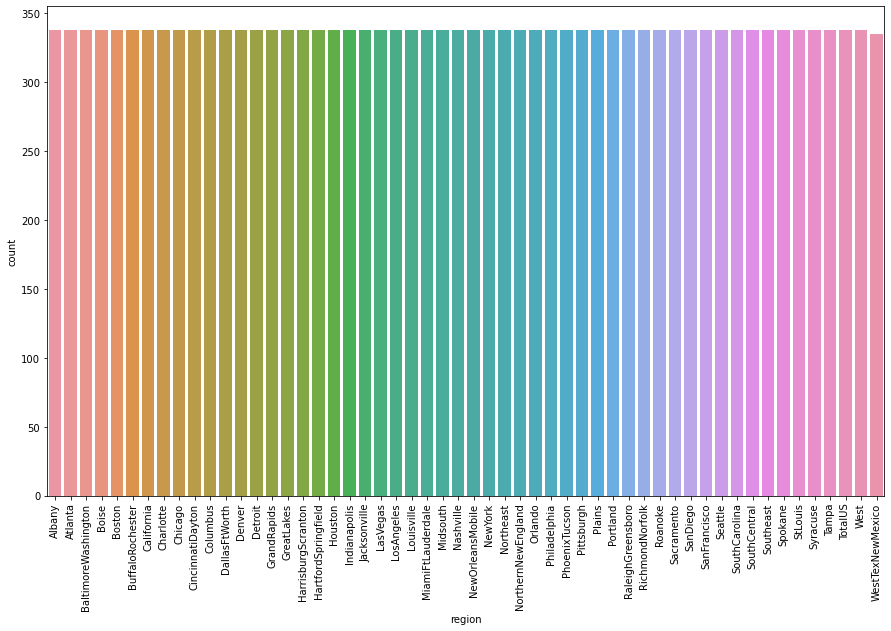

In [35]:
#Visualize the count of year
plt.figure(figsize=(15,9))
sns.countplot(df["region"])
plt.xticks(rotation=90)
plt.show()

we can see from the above graph avocado numbers in all the region is almost same.

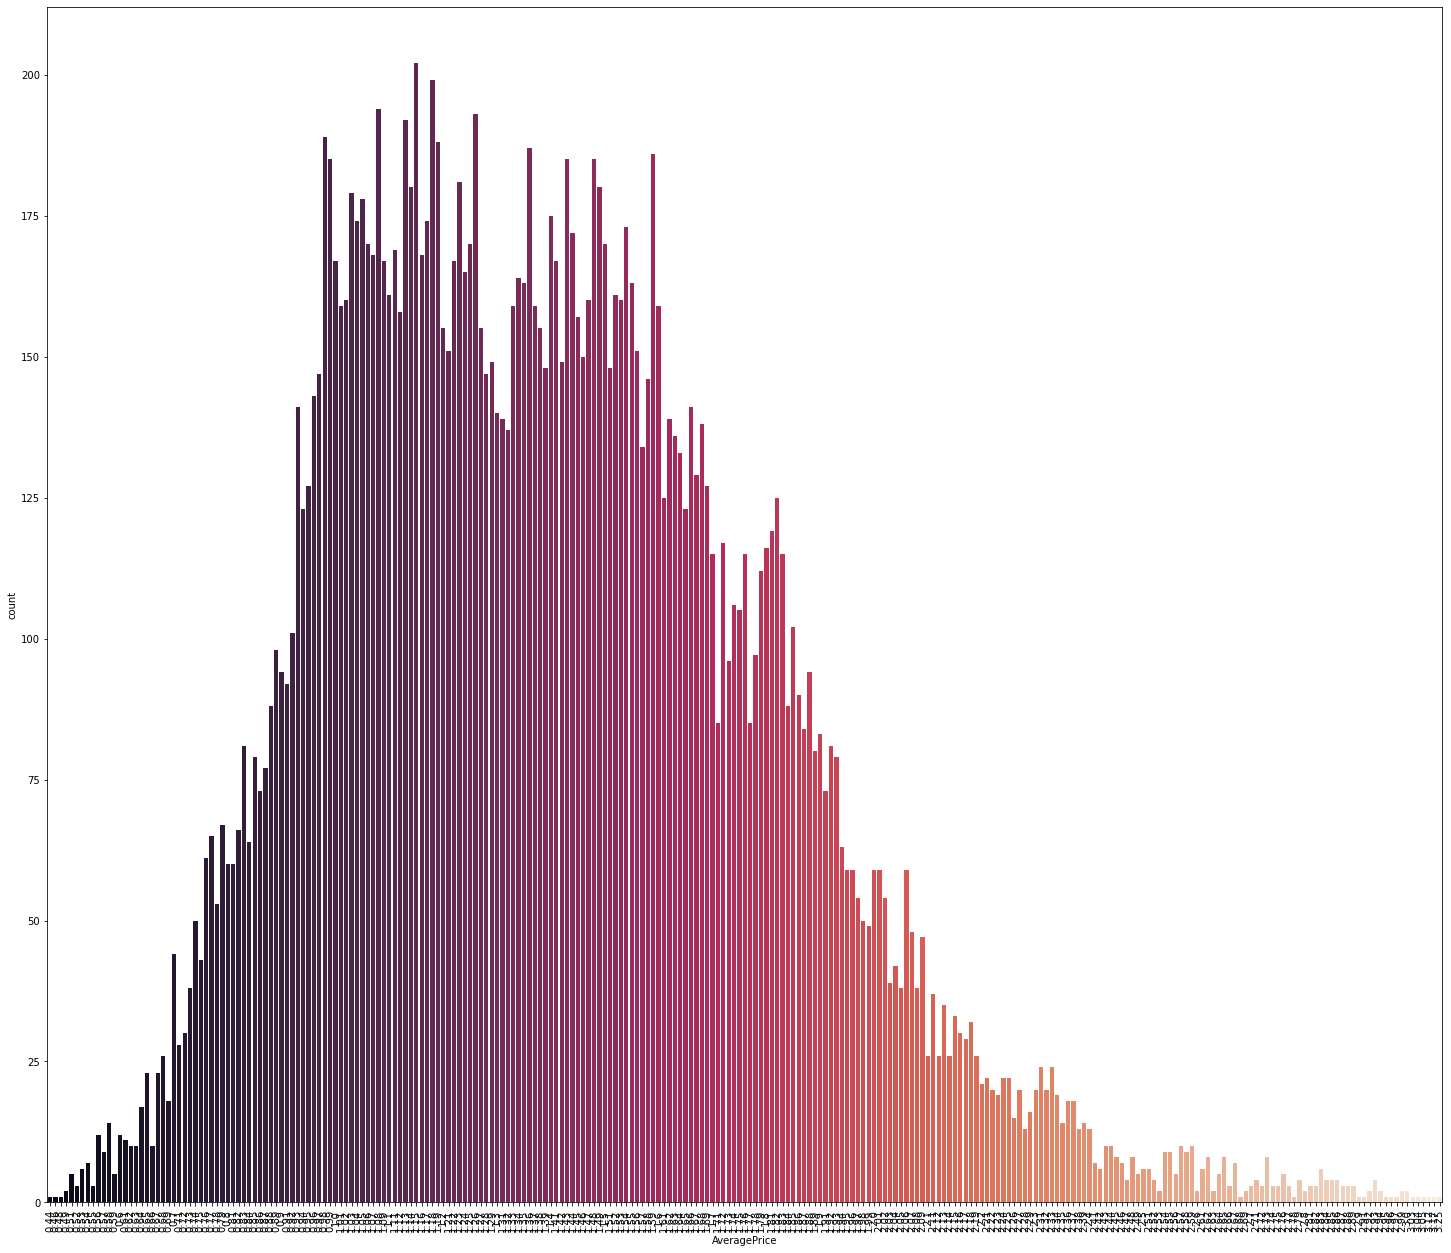

In [36]:
plt.figure(figsize=(25,22))
sns.countplot(df["AveragePrice"],palette="rocket");
plt.xticks(rotation=90)
plt.show()

It is difficult to analyse but this shows the average price of avocado.

## Bivariate Analysis

Text(0, 0.5, 'region')

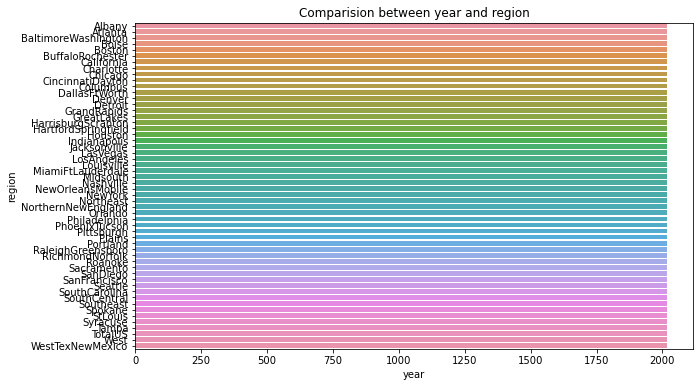

In [37]:
# Checking which year has maximum AveragePrice
plt.figure(figsize=[10,6])
plt.title('Comparision between year and region')
sns.barplot(df['year'],df['region'], data=df);
plt.xlabel("year")
plt.ylabel("region")

the above plot shows that all the year avocado sale is almost same in all the region.

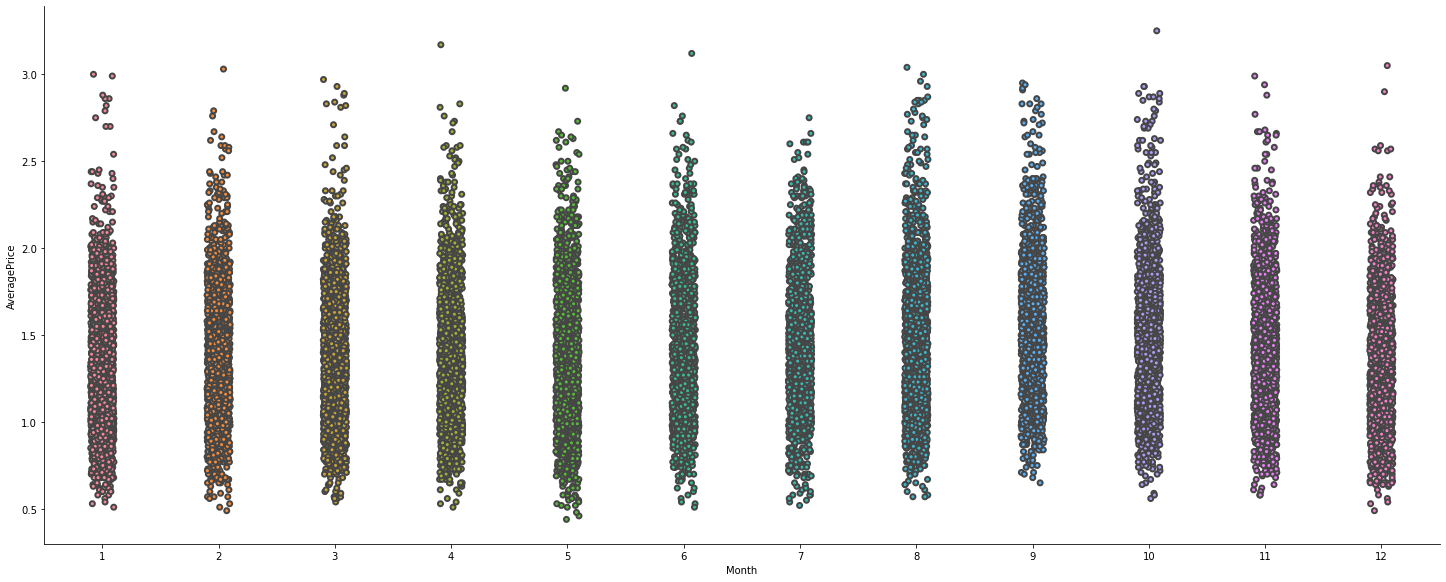

In [38]:
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=2.5)

Average price of avocado is high in august, september and october month.

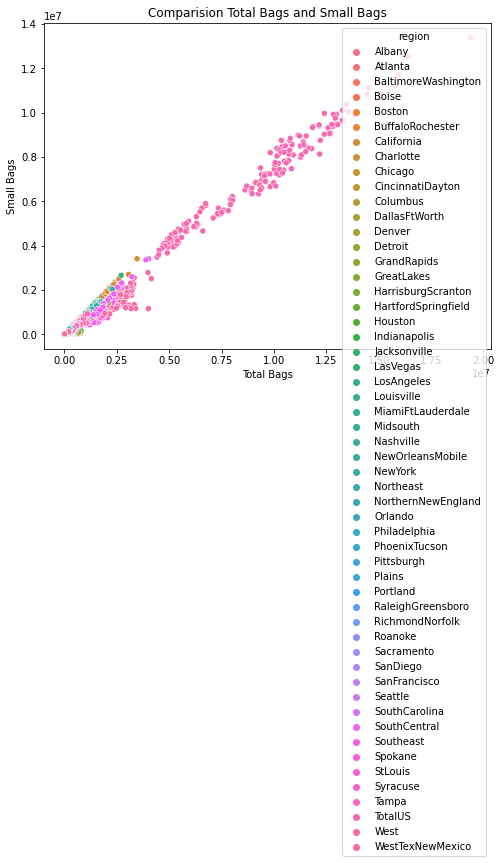

In [39]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision Total Bags and Small Bags')
sns.scatterplot(df['Total Bags'],df['Small Bags'],hue=df["region"]);

There is a linear distribution between Total bags and small bags for all the region.

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

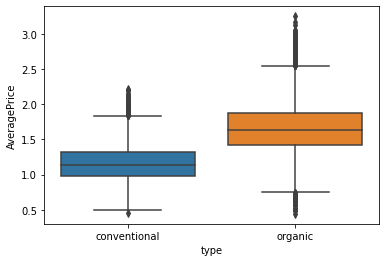

In [40]:
sns.boxplot(x='type',y='AveragePrice',data=df)

Average price is more for organic Avocado.

<AxesSubplot:xlabel='Month', ylabel='region'>

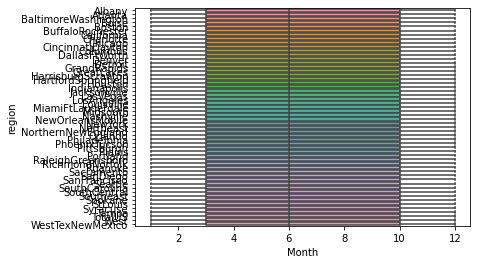

In [41]:
sns.boxplot(x='Month',y='region',data=df)

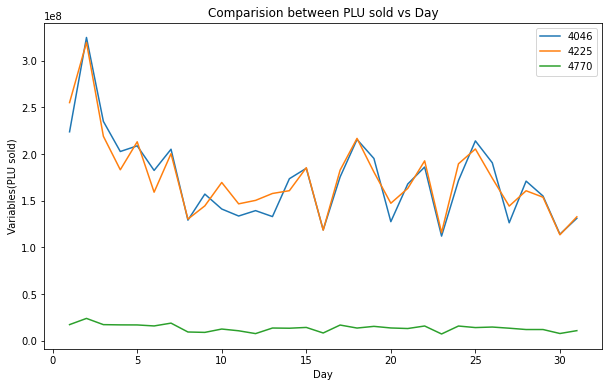

In [42]:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()
variables.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

From the line plot we can observe how the total number of avocados with PLU 4046, PLU 4225 and PLU 4770 are sold in each day.

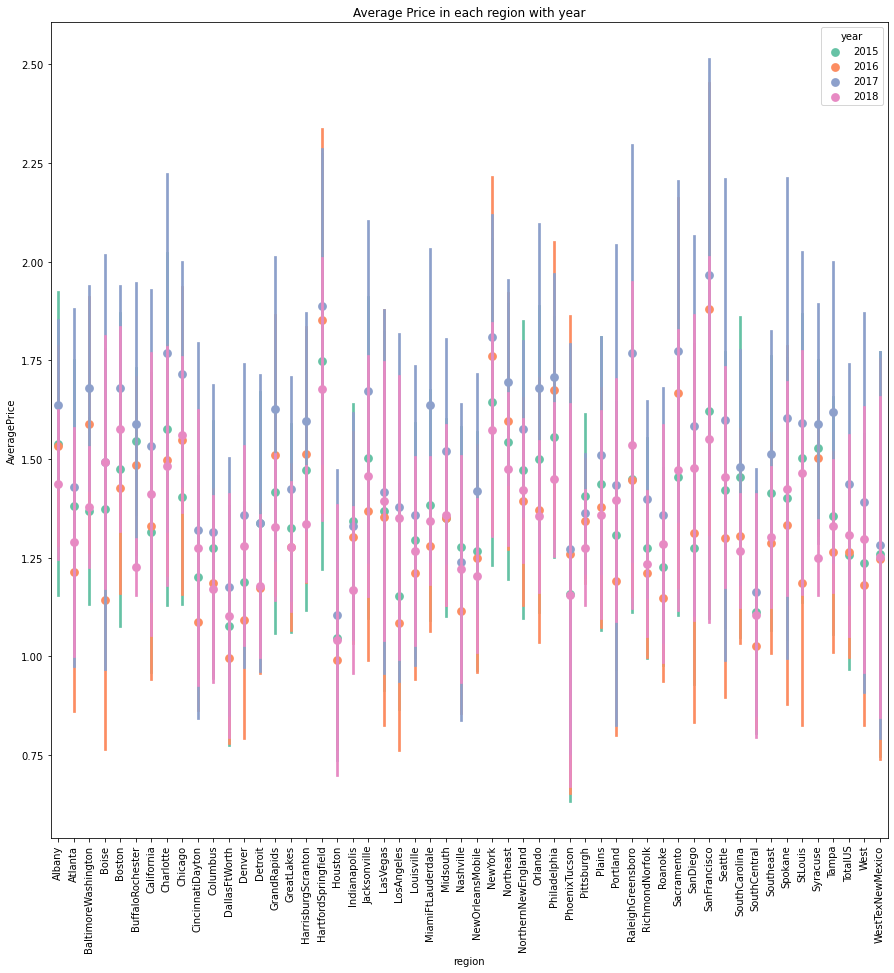

In [43]:
plt.figure(figsize=(15,15))
plt.title("Average Price in each region with year")
sns.pointplot(x='region',y='AveragePrice',data=df, hue='year',join=False,palette="Set2",ci="sd")
plt.xticks(rotation=90)
plt.show()

The average price of the avocado is high in the region SanFrancisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high in the year 2017 and less in the year 2018.

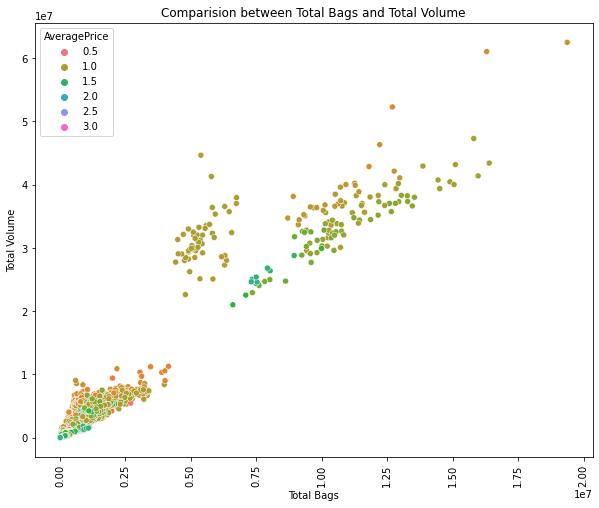

In [44]:
plt.figure(figsize=(10,8))
plt.title("Comparision between Total Bags and Total Volume")
sns.scatterplot(x='Total Bags',y='Total Volume',hue="AveragePrice",data=df,palette="husl")
plt.xticks(rotation=90)
plt.show()

There is a linear relationship between the features. As the total bags sales increases with total volume, the average price of the avocado also increases.

## Multivariate Analysis

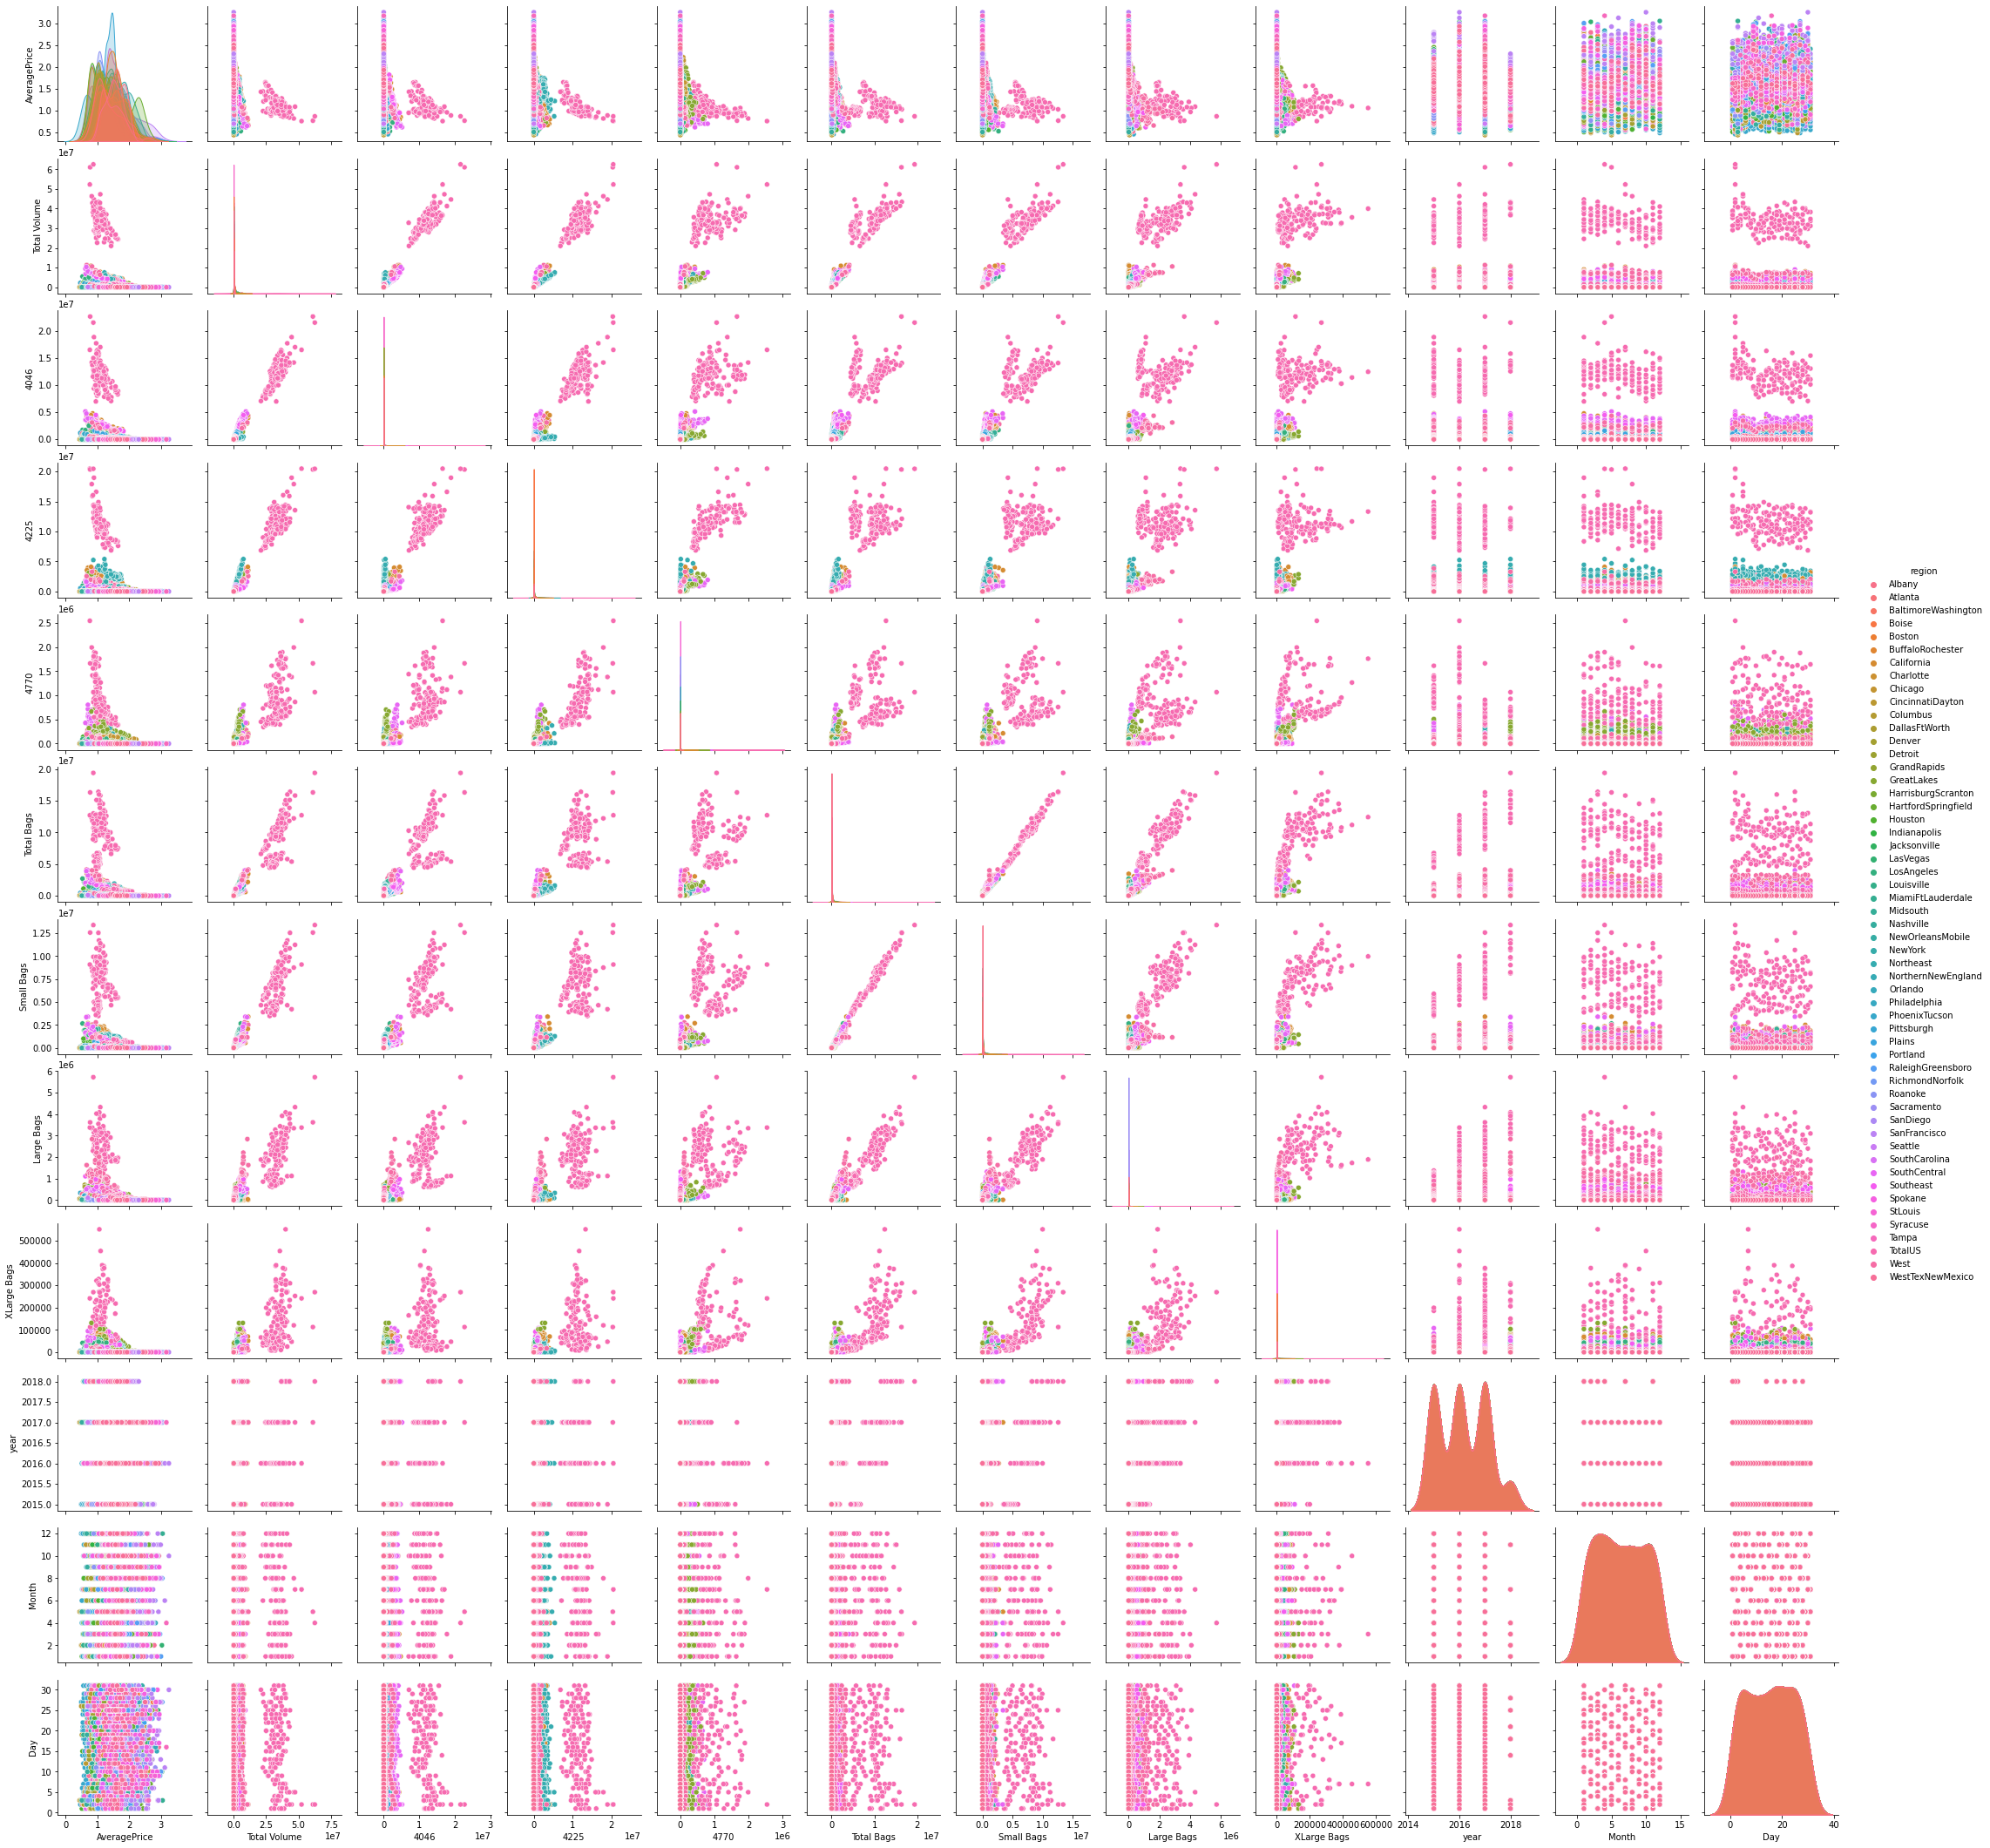

In [45]:
sns.pairplot(df,hue="region")

# Checking for outliers:

<AxesSubplot:>

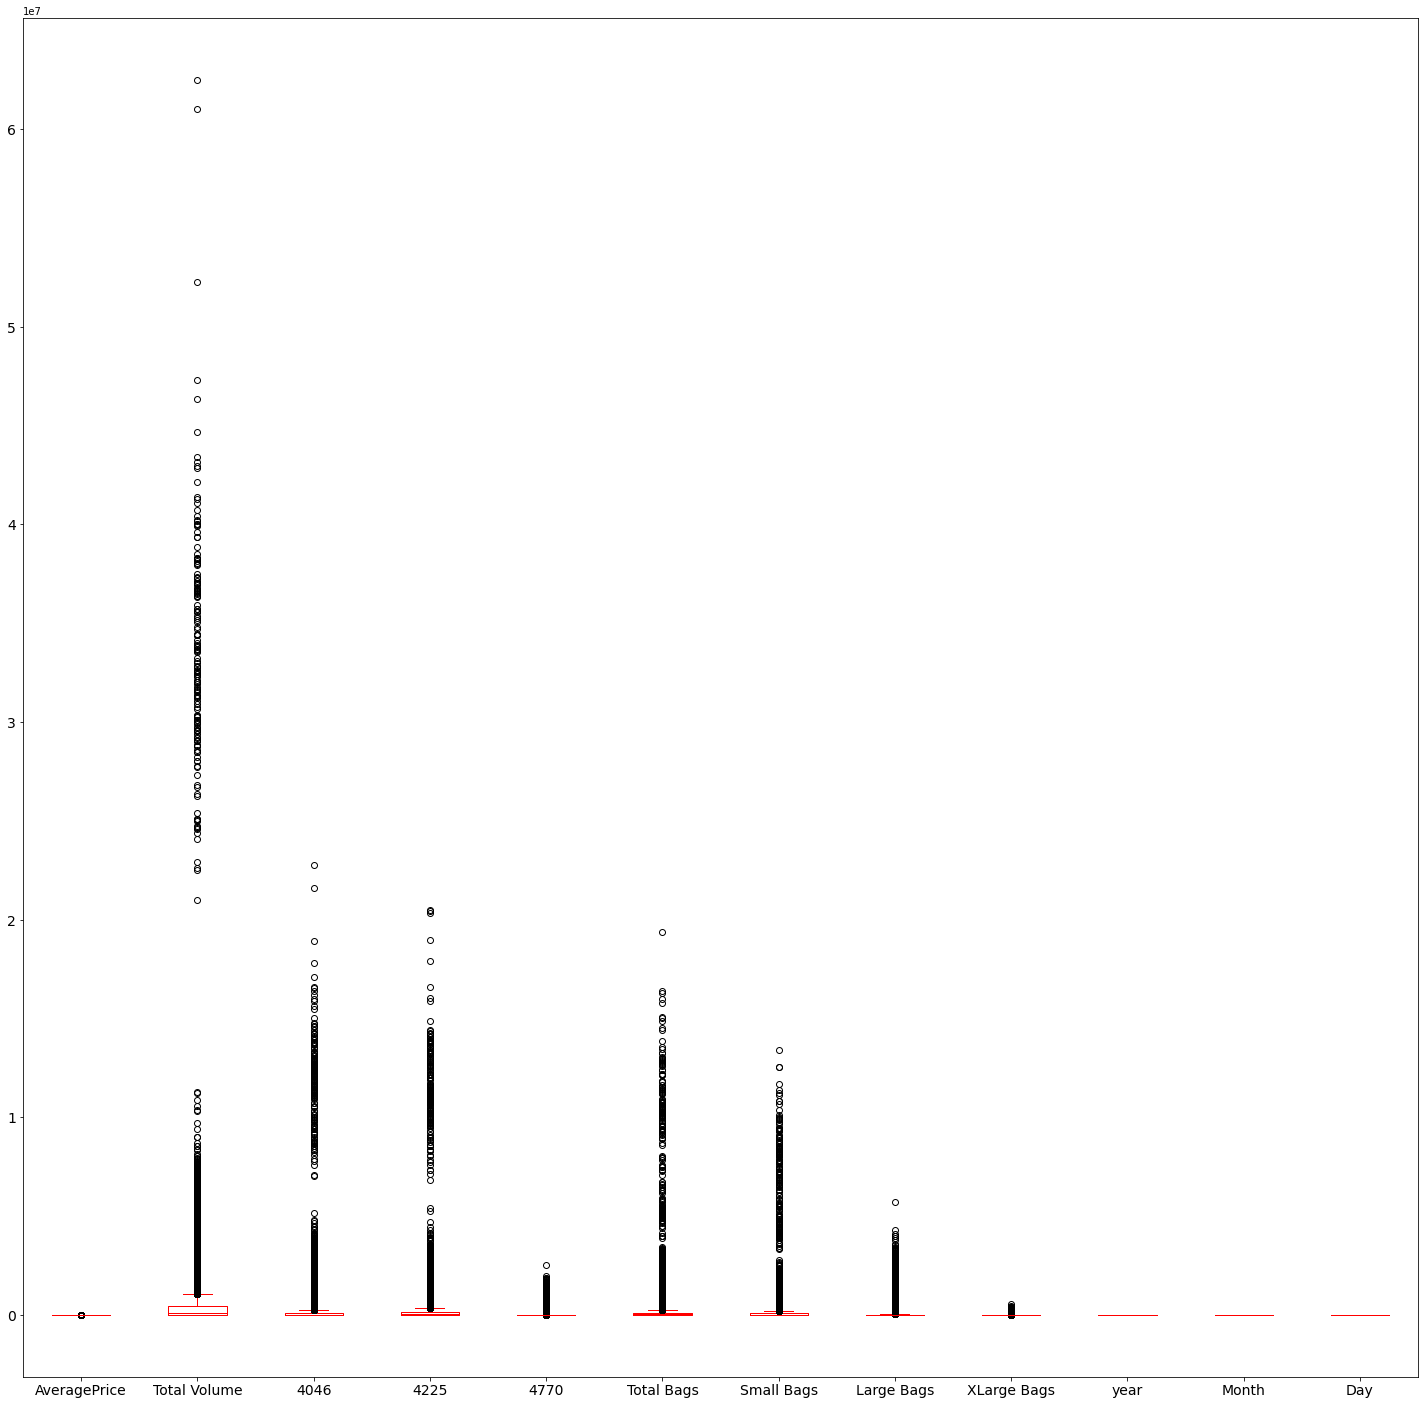

In [27]:
df.plot(kind='box',fontsize=14,figsize=(25,25),color='r')

# Removing Outliers:

## i) Zscore method

In [98]:
# Features containing outliers
features = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [99]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

array([[0.22771641, 0.23081597, 0.1999022 , ..., 0.2326465 , 0.22235202,
        0.17557961],
       [0.23042664, 0.23110251, 0.20805446, ..., 0.23156838, 0.22233464,
        0.17557961],
       [0.21208462, 0.23100731, 0.1544779 , ..., 0.23339891, 0.22231148,
        0.17557961],
       ...,
       [0.24233073, 0.2306933 , 0.24309014, ..., 0.23164379, 0.22256082,
        0.17557961],
       [0.24162464, 0.2304279 , 0.24265143, ..., 0.22954271, 0.2225293 ,
        0.17557961],
       [0.24125273, 0.22934712, 0.24317042, ..., 0.22811058, 0.22262764,
        0.17557961]])

In [100]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17782 rows x 14 columns]

In [101]:
# Shape of original dataset
df.shape

(18249, 14)

Before removing the outliers we had 18249 rows and 14 columns in our dataset.

In [102]:
# Shape of new dataframe
new_df.shape

(17782, 14)

After removing the outliers we have 17782 rows and 14 columns.

In [103]:
# Checking the the data loss
data_loss = (18249-17782)/18249*100
data_loss

2.55904433119623

## ii) IQR (Inter Quantile Range) method

In [104]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [105]:
df1.shape

(11747, 14)

Using IQR method the dataframe has 11747 rows and 14 columns.

In [106]:
# Let's check the dataloss
data_loss = (18249-11747)/18249*100
data_loss

35.62934955340019

Using IQR method I am losing more data. So let's consider Zscore method only.

# Checking for skewness

In [107]:
# Checking the skewness
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

All the columns have skewness except year, Month and Day. AveragePrice is also our label in 2nd condition so no need to remove skewness in this column.

# Removing skewness using yeo-johnson method

In [108]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [109]:
new_df[features] = scaler.fit_transform(new_df[features].values)
new_df[features].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [110]:
# Checking skewness after using yeo=johnson ethod
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

After using yeo-johnson method the skewness is still present in XLarge Bags, Let's remove skewness using log transformation.

In [111]:
# Removing skewness using log transformation
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])

In [112]:
# Let's check the skewness again
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

## Encoding the categorical columns using Label Encoding

In [113]:
categorical_col = ["type","region"]

In [114]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [115]:
new_df[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]


# i) Correlation between the target variable(region) and independent variables using HEAT map

In [116]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
XLarge Bags      -0.392262      0.629752  0.575152  0.583293  0.617192   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.157900     -0.026332 -0.025919 -0.024708 -0.017377   
Day               0.024742     -0.006248 -0.004558 -0.005919  0.001383   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.564616   -0.493621   -0.477879    -0.392262  0.608447   
Total Volume    0.939776    0.905098    0.681427     0.629752 -0.800828   
4046            0.799354    0.778765    0.601899     0.575152 -0.725826   
4225            0.818511    0.784901    0.614878     0.583293 -0.747722   
4770            0.761641    0.754305    0.548457     0.617192 -0.780988   
Total Bags      1.000000    0.949901    0.729652     0.612530 -0.725686   
Small Bags      0.949901    1.000000    0.566307     0.601404 -0.720466   
Large Bags      0.729652    0.566307    1.000000     0.451796 -0.500026   
XLarge Bags     0.612530    0.601404    0.451796     1.000000 -0.672461   
type           -0.725686   -0.720466   -0.500026    -0.672461  1.000000   
year            0.210924    0.185955    0.190295     0.156202  0.007399   
region          0.065996    0.051985    0.086573    -0.017598  0.021970   
Month          -0.014571   -0.010260   -0.016942     0.020885 -0.005044   
Day            -0.003703   -0.000535   -0.000876     0.010991 -0.002469   

                  year    region     Month       Day  
AveragePrice  0.099910  0.010428  0.157900  0.024742  
Total Volume  0.076584  0.065709 -0.026332 -0.006248  
4046         -0.002396  0.159390 -0.025919 -0.004558  
4225         -0.004533  0.032273 -0.024708 -0.005919  
4770         -0.051657  0.037805 -0.017377  0.001383  
Total Bags    0.210924  0.065996 -0.014571 -0.003703  
Small Bags    0.185955  0.051985 -0.010260 -0.000535  
Large Bags    0.190295  0.086573 -0.016942 -0.000876  
XLarge Bags   0.156202 -0.017598  0.020885  0.010991  
type          0.007399  0.021970 -0.005044 -0.002469  
year          1.000000 -0.003610 -0.173166  0.004044  
region       -0.003610  1.000000  0.002175  0.000751  
Month        -0.173166  0.002175  1.000000  0.010456  
Day           0.004044  0.000751  0.010456  1.000000

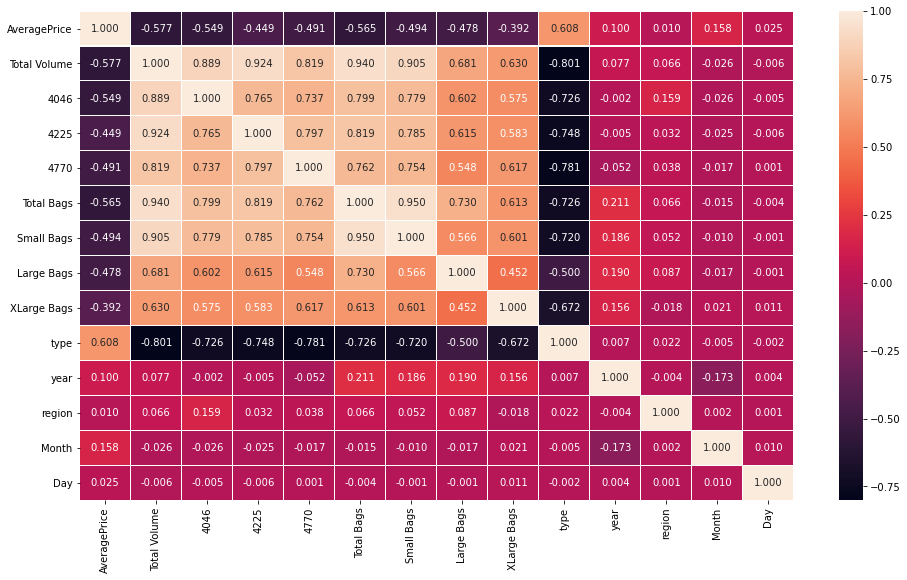

In [117]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.3f', annot = True)
plt.yticks(rotation=0);

This heat map contains both positive and negative correlation.
* Almost all the features are highly negatively correlated with the target variable and few columns year, Month and type have positive correlation with the target.
* The features Day and region have no relation with the target so we can drop these columns.
* Almost all the features are correlated with each other which leads to multicollinearity problem. We will solve this problem by VIF value.
* Also most of the columns have no relation with each other and have zero correlation.

## (i) Region as a target variable

In [118]:
cor['region'].sort_values(ascending=False)

region          1.000000
4046            0.159390
Large Bags      0.086573
Total Bags      0.065996
Total Volume    0.065709
Small Bags      0.051985
4770            0.037805
4225            0.032273
type            0.021970
AveragePrice    0.010428
Month           0.002175
Day             0.000751
year           -0.003610
XLarge Bags    -0.017598
Name: region, dtype: float64

# Visualizing the correlation between label and features using bar plot

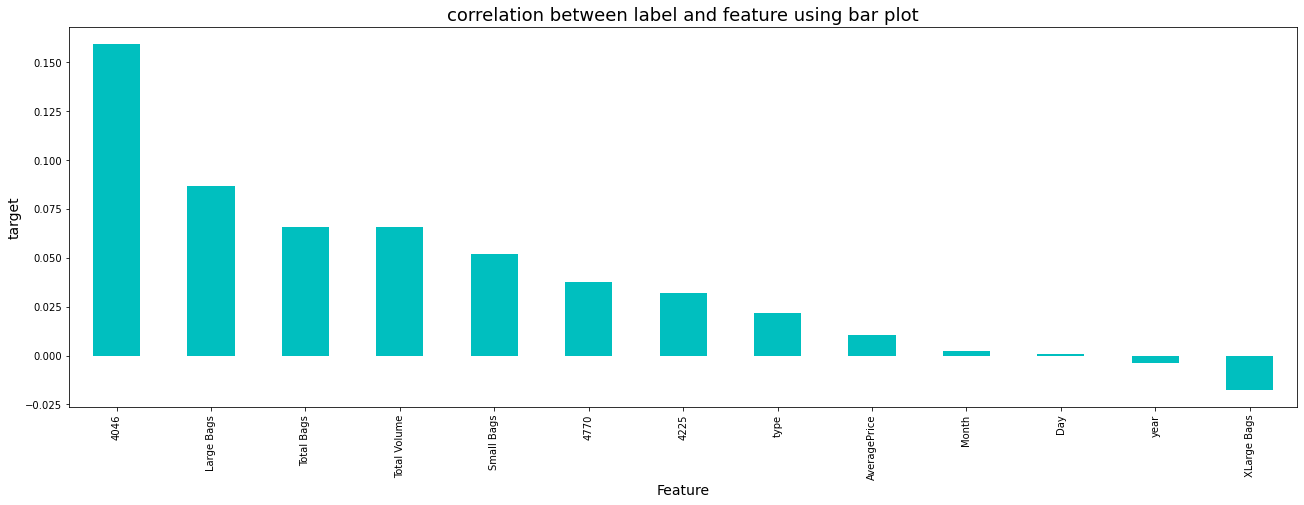

In [119]:
plt.figure(figsize=(22,7))
new_df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

The features month,Day and year have very less correlation with the target so we can drop these columns.

In [120]:
# Dropping irrelevant columns
new_df.drop("Month",axis=1, inplace=True)
new_df.drop("Day",axis=1, inplace=True)
new_df.drop("year",axis=1, inplace=True)

In [121]:
new_df.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  XLarge Bags  type  region  
0   -0.337064   -0.775214    -1.126094     0       0  
1   -0.301038   -0.765237    -1.126094     0       0  
2   -0.364044   -0.752534    -1.126094     0       0  
3   -0.500341   -0.693012    -1.126094     0       0  
4   -0.479918   -0.600755    -1.126094     0       0

# Separating the features and label variables into x and y

In [122]:
x = new_df.drop("region", axis=1)
y = new_df["region"]

In [123]:
x.shape

(17782, 10)

In [124]:
y.shape

(17782,)

In [125]:
x.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  XLarge Bags  type  
0   -0.337064   -0.775214    -1.126094     0  
1   -0.301038   -0.765237    -1.126094     0  
2   -0.364044   -0.752534    -1.126094     0  
3   -0.500341   -0.693012    -1.126094     0  
4   -0.479918   -0.600755    -1.126094     0

# Standard Scalarization

In [126]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0         -0.212660     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1         -0.162942     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2         -1.207026      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3         -0.834139      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4         -0.336956     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   
...             ...           ...       ...       ...       ...         ...   
17777      0.533114     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   
17778      0.731987     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   
17779      1.129733     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   
17780      1.278888     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   
17781      0.508255     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   

       Small Bags  Large Bags  XLarge Bags      type  
0       -0.337064   -0.775214    -0.685946 -1.026443  
1       -0.301038   -0.765237    -0.685946 -1.026443  
2       -0.364044   -0.752534    -0.685946 -1.026443  
3       -0.500341   -0.693012    -0.685946 -1.026443  
4       -0.479918   -0.600755    -0.685946 -1.026443  
...           ...         ...          ...       ...  
17777   -0.165765   -0.405895    -0.685946  0.974238  
17778   -0.321645   -0.478556    -0.685946  0.974238  
17779   -0.303466   -0.945246    -0.685946  0.974238  
17780   -0.240252   -0.910471    -0.685946  0.974238  
17781   -0.201685   -1.042930    -0.685946  0.974238  

[17782 rows x 10 columns]

## Checking VIF values to solve multicollinearity

In [127]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.953436  AveragePrice
1   53.081453  Total Volume
2    6.727948          4046
3   11.914313          4225
4    3.785695          4770
5   34.270355    Total Bags
6   17.203888    Small Bags
7    3.441587    Large Bags
8    1.995842   XLarge Bags
9    4.177644          type

The VIF value is more than 10 in Total Volume, 4225, Total Bags and Small Bags.First I will remove the column having high VIF value and will check the VIF again, if the value retains more than 10 then I will drop the specific column again.

In [128]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [129]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.900420  AveragePrice
1    3.488702          4046
2    4.361739          4225
3    3.774532          4770
4   25.458461    Total Bags
5   17.192486    Small Bags
6    3.391722    Large Bags
7    1.985403   XLarge Bags
8    4.044390          type

The multocollinearity problem still exists so let's drop the feature Total Bags which has VIF value more than 10.

In [130]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [131]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

VIF values      Features
0    1.795018  AveragePrice
1    3.488172          4046
2    4.171954          4225
3    3.770026          4770
4    3.559855    Small Bags
5    1.861771    Large Bags
6    1.982726   XLarge Bags
7    4.024956          type

The VIF value is less than 10 in all the features which means we have solved the multicollinearity problem. Now we can move to model building.

In [132]:
# DataFrame after preprocessing and data cleaning
x.head()

AveragePrice      4046      4225      4770  Small Bags  Large Bags  \
0     -0.212660 -0.649918  0.358278 -0.212550   -0.337064   -0.775214   
1     -0.162942 -0.770067  0.276355 -0.165117   -0.301038   -0.765237   
2     -1.207026 -0.724508  0.656010  0.034215   -0.364044   -0.752534   
3     -0.834139 -0.625017  0.475615 -0.110976   -0.500341   -0.693012   
4     -0.336956 -0.677083  0.268966 -0.100289   -0.479918   -0.600755   

   XLarge Bags      type  
0    -0.685946 -1.026443  
1    -0.685946 -1.026443  
2    -0.685946 -1.026443  
3    -0.685946 -1.026443  
4    -0.685946 -1.026443

# Finding best random state

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7941893158388004  on Random_state  71


## Creating train-test-split

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [135]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

## i) Decision Tree Classifier

In [136]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7895032802249297
[[86  0  0 ...  0  0  0]
 [ 0 70  0 ...  0  0  1]
 [ 0  0 87 ...  0  0  2]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  2  2 ...  0  0 67]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.76       112
           1       0.69      0.65      0.67       107
           2       0.87      0.84      0.86       103
           3       0.82      0.78      0.80       106
           4       0.79      0.88      0.83       104
           5       0.74      0.65      0.69       110
           6       0.95      0.94      0.94        99
           7       0.80      0.79      0.80       104
           8       0.95      0.93      0.94       107
           9       0.85      0.84      0.84       113
          10       0.75      0.67      0.71        97
          11       0.77      0.81      0.79       112
          12       0.81      0.77      0.79        97
          13       0.69      0.74      0.71        95
          14  

## ii) Random Forest Classifier

In [137]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8963448922211809
[[99  0  0 ...  0  0  0]
 [ 0 89  0 ...  0  0  0]
 [ 0  0 99 ...  0  0  0]
 ...
 [ 0  0  0 ... 63  0  0]
 [ 0  0  0 ...  0 69  0]
 [ 0  0  1 ...  0  0 87]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       112
           1       0.90      0.83      0.86       107
           2       0.97      0.96      0.97       103
           3       0.89      0.82      0.85       106
           4       0.95      0.92      0.94       104
           5       0.88      0.83      0.85       110
           6       0.98      0.97      0.97        99
           7       0.91      0.89      0.90       104
           8       0.99      0.98      0.99       107
           9       0.90      0.92      0.91       113
          10       0.91      0.92      0.91        97
          11       0.88      0.96      0.92       112
          12       0.95      0.94      0.94        97
          13       0.85      0.84      0.85        95
          14  

## iii) Support Vector Machine Classifier

In [138]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7660731021555763
[[102   0   0 ...   0   0   0]
 [  0  56   0 ...   0   0   0]
 [  0   0  85 ...   0   0   0]
 ...
 [  0   0   0 ...  63   0   0]
 [  0   0   0 ...   0  67   0]
 [  0   1   1 ...   0   0  59]]
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       112
           1       0.55      0.52      0.54       107
           2       0.91      0.83      0.87       103
           3       0.78      0.72      0.75       106
           4       0.80      0.76      0.78       104
           5       0.76      0.58      0.66       110
           6       0.96      0.92      0.94        99
           7       0.78      0.69      0.73       104
           8       0.99      0.90      0.94       107
           9       0.79      0.78      0.78       113
          10       0.55      0.61      0.58        97
          11       0.76      0.88      0.82       112
          12       0.91      0.94      0.92        97
          13       0.48      0.7

## iv) KNeighbors Classifier

In [139]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.831302717900656
[[100   0   0 ...   0   0   0]
 [  0  84   0 ...   0   0   0]
 [  0   0  93 ...   0   0   0]
 ...
 [  0   0   0 ...  63   0   0]
 [  0   0   0 ...   0  68   0]
 [  0   1   1 ...   0   0  68]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       112
           1       0.73      0.79      0.76       107
           2       0.92      0.90      0.91       103
           3       0.81      0.70      0.75       106
           4       0.82      0.86      0.84       104
           5       0.80      0.79      0.79       110
           6       0.97      0.98      0.97        99
           7       0.80      0.83      0.81       104
           8       0.94      0.95      0.95       107
           9       0.83      0.86      0.84       113
          10       0.69      0.78      0.73        97
          11       0.86      0.96      0.91       112
          12       0.91      0.91      0.91        97
          13       0.65      0.72

# Checking the Cross Validation Score

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.5470105209297531


In [142]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.6791069780179643


In [143]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.6126920791493697


In [144]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.6034687064875957


From the difference between accuracy score and Cross Validation Score we can conclude that Support vector classifier is our best fitting model.

# Hyper parameter tuning

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
#SupportVectorMachine Classifier
parameter = {'C':[0.01,0.1,1,10],'kernel':['linear','rbf'],'gamma':['scale','auto'],'tol':[0.0001,0.001,0.01,0.1]}

In [147]:
GCV=GridSearchCV(SVC(),parameter,cv=5)

In [148]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf'],
                         'tol': [0.0001, 0.001, 0.01, 0.1]})

In [149]:
GCV.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf', 'tol': 0.0001}

In [150]:
Final_mod=SVC(C=10,gamma='auto',kernel='rbf',tol=0.0001)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

84.96719775070291


# Saving the Model

In [151]:
import joblib
joblib.dump(Final_mod,"Avocado1.pkl")

['Avocado1.pkl']

# Predictions:

In [152]:
# Loading the saved model
model=joblib.load("Avocado1.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([42, 13, 44, ..., 51,  0, 16])

In [153]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Actual"])

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted    42    13    44     1    50    39    50    30    13     1  ...   
Actual       42    13    44     1    50    39    50    30    10    32  ...   

           5325  5326  5327  5328  5329  5330  5331  5332  5333  5334  
Predicted    12    14    26    46    14    43    24    51     0    16  
Actual       12    14    39    46    14    43    24    51     0    16  

[2 rows x 5335 columns]

Above are the predicted and actual values they are same which is good.

# ii) Average Price as a target variable

In [245]:
df=pd.read_csv('avacado.csv')
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

# Exploratory Data Analysis (EDA)

In [246]:
# Checking the dimension of the dataset
df.shape

(18249, 14)

There are 18249 rows and 13 columns are there in the dataset. Out of 13, 12 are different features and remaining one is the label "Average Price".

In [247]:
# Checking the types of the dataset
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

I have Date, type and region columns as object type data.Unnamed:0 and year as integer type data, and rest all columns as float type data.

In [248]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


It is quite clear that in my dataset there are no null values by looking into above info.

In [249]:
#Checking unique values of each column
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Above are the unique value counts of each column in the dataset.

And the Unnnamed:0 column acts as index column so it has nothing to do with model training so let's drop it here itself.

In [250]:
#Droping Unnamed column
df = df.drop(["Unnamed: 0"],axis=1)

In [251]:
#Checking null values in the dataset
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

It looks clear that i don't have any null values in the dataset.

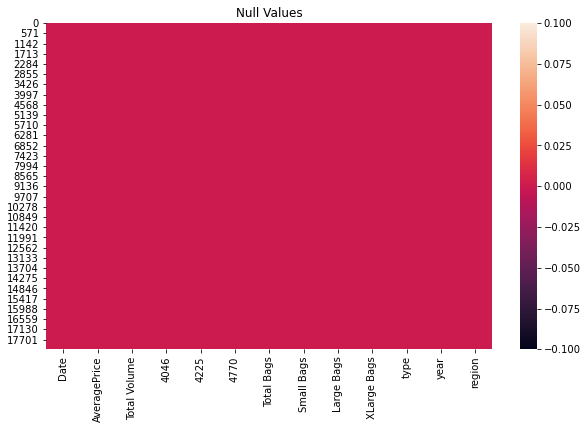

In [252]:
#Visualizeing null values
plt.figure(figsize=[10,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

In [253]:
#Checking unique values of target column
df['AveragePrice'].unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

Above are the unique value count of target column.

In [254]:
#Checking for empty observations
df.loc[df['AveragePrice'] == " "]

Empty DataFrame
Columns: [Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region]
Index: []

So i don't have any empty observations in my target column.

In [255]:
#Checking value counts of target column
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64

Above are the value counts of target column.

# Feature engineering

In [256]:
# Changing date column from object type to Date Type
df["Date"]=pd.to_datetime(df["Date"])

In [257]:
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

We can see the Date column has datetime data type. Now let's split this data into months and day.

In [258]:
df["Month"] = df["Date"].dt.month

In [259]:
df["Day"] = df["Date"].dt.day

Now we have separated Month and Day from Date column and now the column Date is of no use, so let's drop it.

In [260]:
df.drop("Date",axis=1,inplace=True)

In [261]:
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  Month  Day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20  
2     8042.21      103.14          0.0  conventional  2015  Albany     12   13  
3     5677.40      133.76          0.0  conventional  2015  Albany     12    6  
4     5986.26      197.69          0.0  conventional  2015  Albany     11   29

In [262]:
#Checking description of data set
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

              Month           Day  
count  18249.000000  18249.000000  
mean       6.177215     15.662612  
std        3.534130      8.776281  
min        1.000000      1.000000  
25%        3.000000      8.000000  
50%        6.000000     16.000000  
75%        9.000000     23.000000  
max       12.000000     31.000000

Above is the data description of the dataset.

# Data Visualization

## Univariate Analysis

In [263]:
continuous_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
categorical_cols = ['year', 'Day', 'Month', 'type', 'region']

Above are the two types of columns in the dataset.i.e.,Continuous columns and Categorical columns.

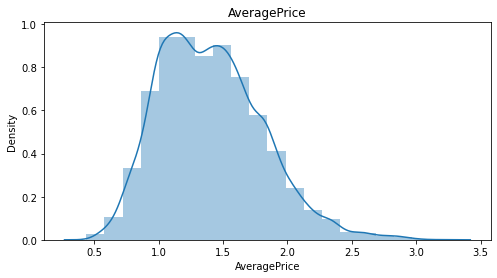

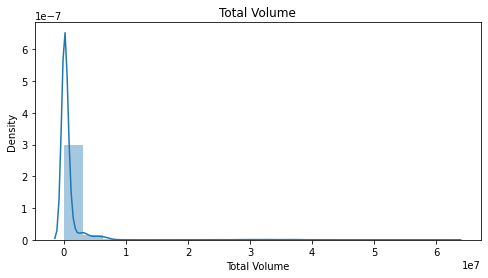

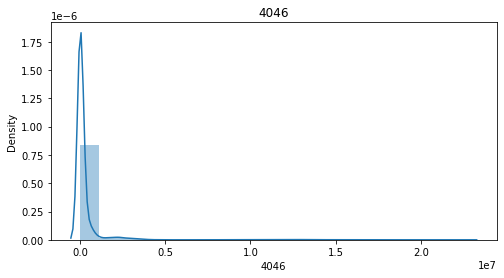

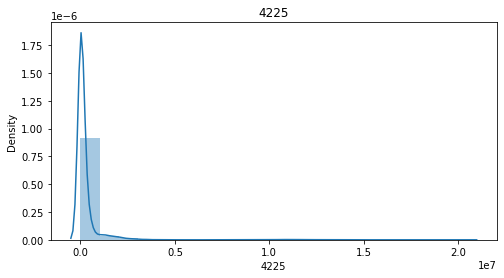

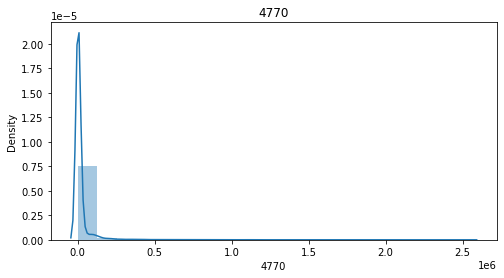

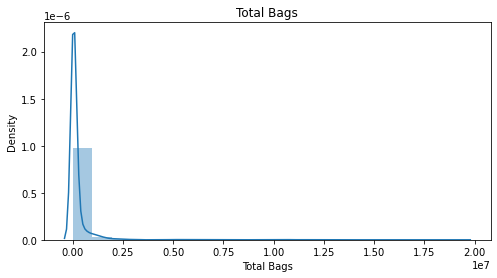

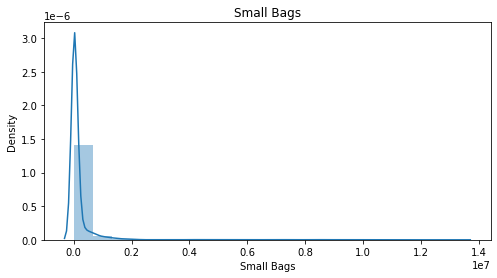

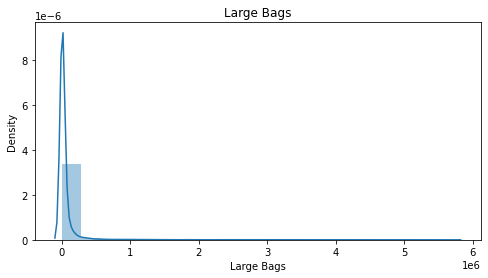

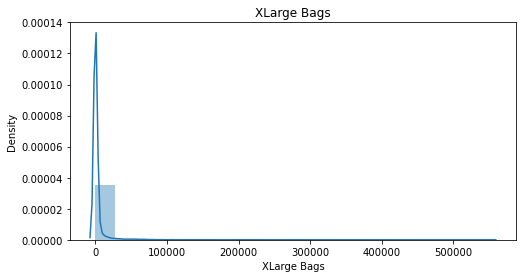

In [264]:
for i in df[continuous_cols]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 20)
    plt.title(i)
    plt.show()

Except AveragePrice all the other columns are skewed.

In [265]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

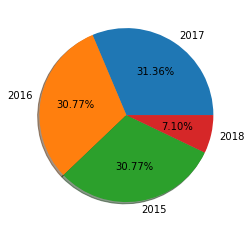

In [266]:
#Ploting pie chart for years
labels='2017','2016','2015','2018'
fig, ax = plt.subplots()
ax.pie(df['year'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

In 2017 the sales of avacado with average prize is more comparitivly.

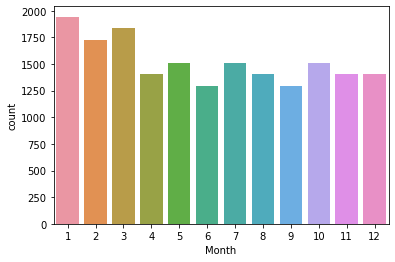

In [197]:
#Count plot for Month
sns.countplot(df['Month']);

In january and march the count is more.

conventional    9126
organic         9123
Name: type, dtype: int64


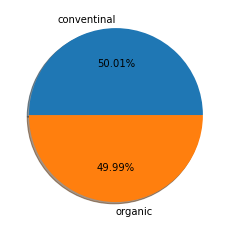

In [199]:
print(df.type.value_counts())
labels='conventinal','organic'
fig, ax = plt.subplots()
ax.pie(df['type'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

We can observe both conventional and organic types of avocado are equal in counts. Which means half of the avocado products involves chemicals. Both types have equal demand.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


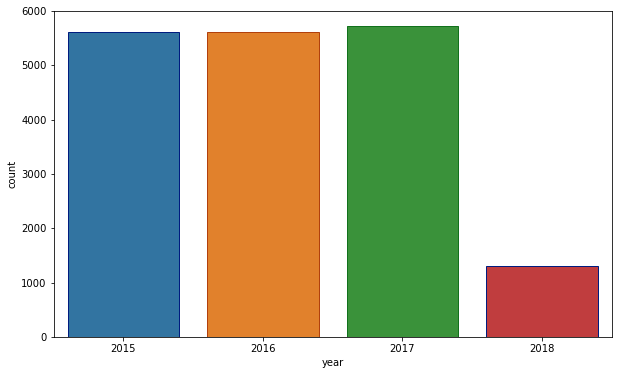

In [200]:
#Visualize the count of year
print(df["year"].value_counts())
plt.figure(figsize=(10,6))

sns.countplot(df["year"],edgecolor=sns.color_palette("dark", 3))
plt.show()

The count of 2017 is bit higher than 2016 and 2015, 2018 has very less count, whch means the price and the sales of avocado is less in this year

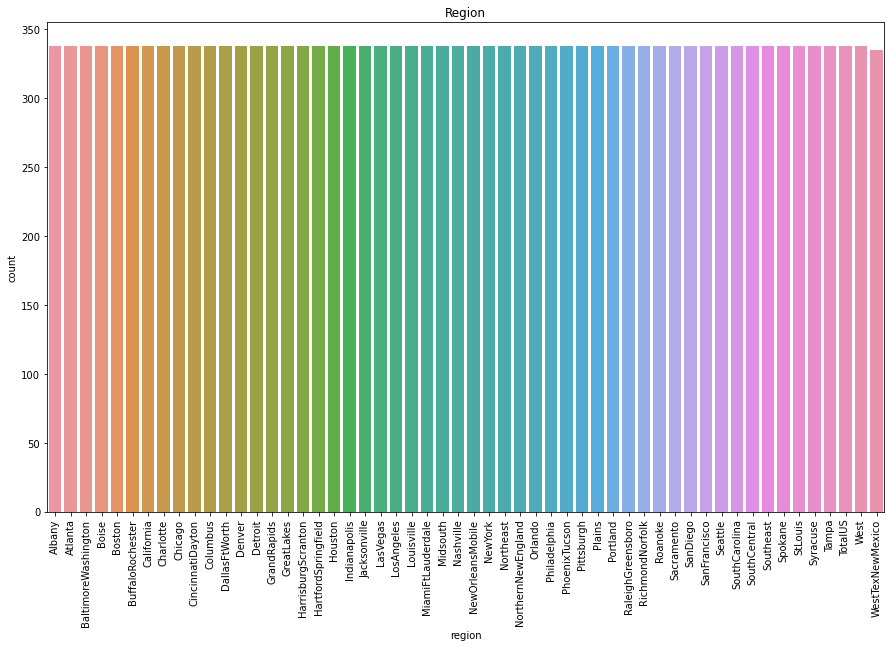

In [201]:
#Visualize the count of year
plt.figure(figsize=(15,9))
sns.countplot(df["region"])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

We can observe the count of avocado is almost same in all the regions, all of them have the count 338 but WestTexNewMexico has count 335 which is bit less than others.

Let's plot the distribution plot to know how the data has been distributed in all the columns.

## Distribution of skewness

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64


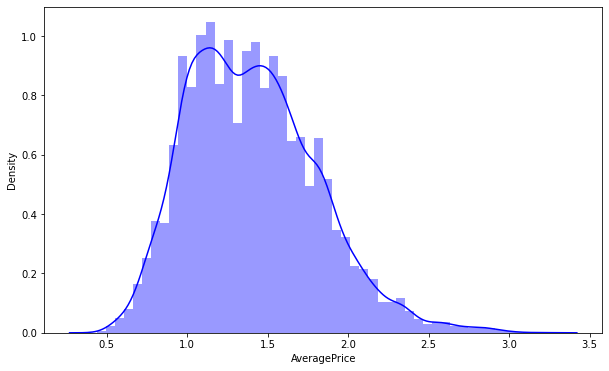

In [202]:
# Distribution plot for target variable "AveragePrice"
print(df["AveragePrice"].value_counts())
plt.figure(figsize=(10,6))
sns.distplot(df["AveragePrice"], color="b")
plt.show()

Here we can infer that the data is normally distributed in the label. Also the price of the avocado is more between 1.15 - 1.5.

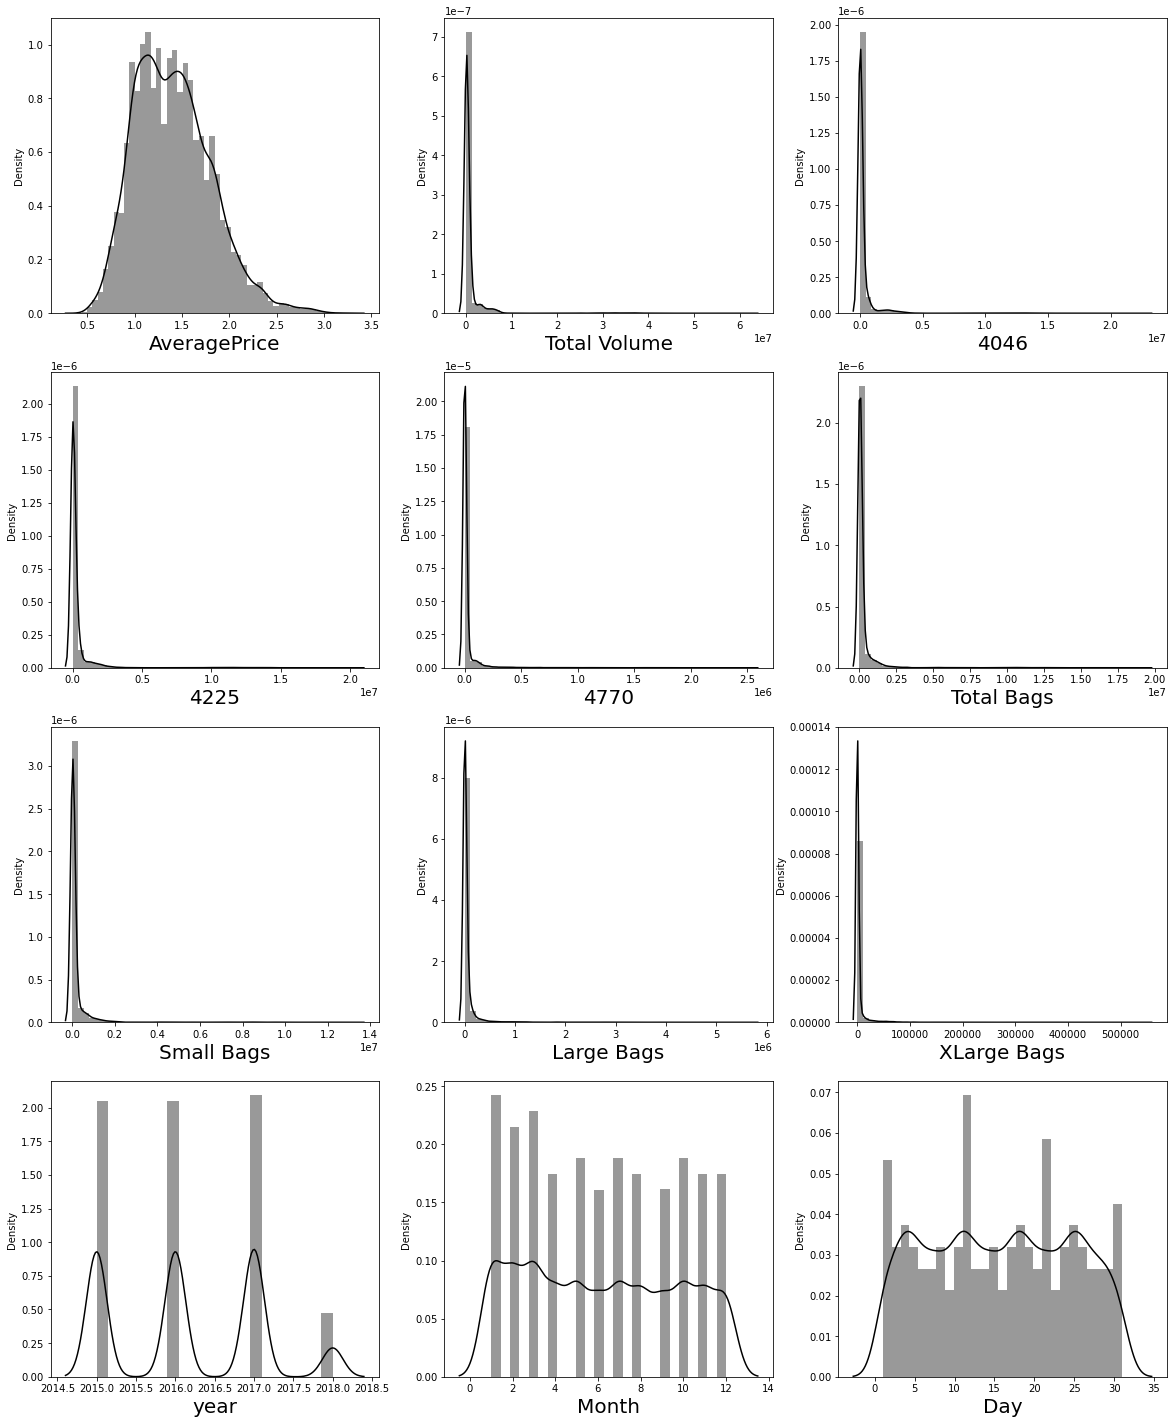

In [203]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='k')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Most of them are skewed to left, which means median is more than the mean in these columns. So will remove these skewness later.

## Bivariate Analysis

Text(0, 0.5, 'AveragePrice')

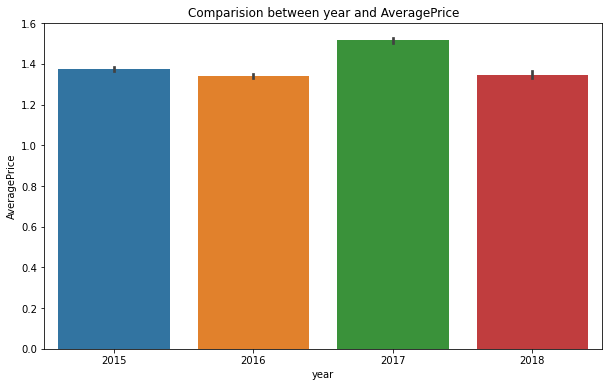

In [204]:
# Checking which year has maximum AveragePrice
plt.figure(figsize=[10,6])
plt.title('Comparision between year and AveragePrice')
sns.barplot(df['year'],df['AveragePrice'], data=df);
plt.xlabel("year")
plt.ylabel("AveragePrice")

The barplot shows that the AveragePrice is maximum in the year 2017 followed by 2015.

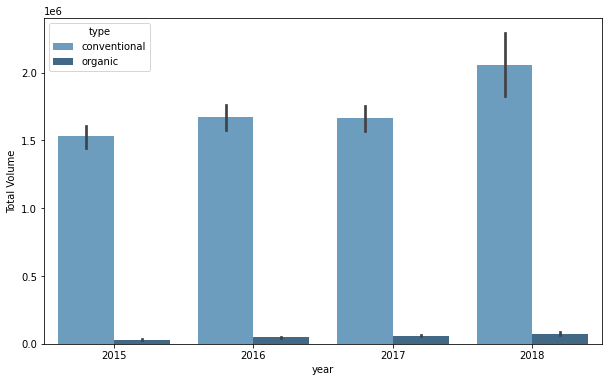

In [205]:
plt.figure(figsize=(10,6))
sns.barplot(x='year',y='Total Volume',hue="type",data=df,palette="Blues_d",ci=68)
plt.show()

Conventional types were sold higher every year with low price than Organic types which means the demand for conventional is high. Also The Total sales volume is spotted highest in the year 2018 and then declined in 2015. The total sales are same in the year 2016 and 2017.

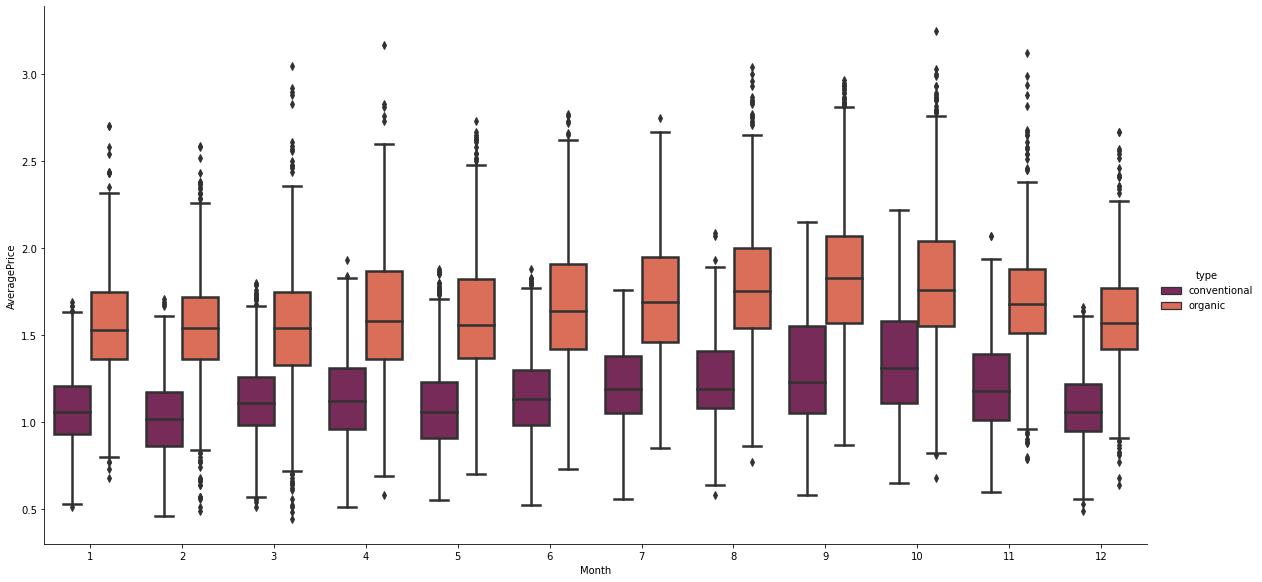

In [206]:
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8, linewidth=2.5, aspect=2,palette="rocket");

Here we can notice that the AveragePrice of organic avocado fruit is more than the conventional type. As we can observe the AveragePrice of both type of avocados is high in the months August, September and October and it pulled down in November. Also the price is high in April and March.

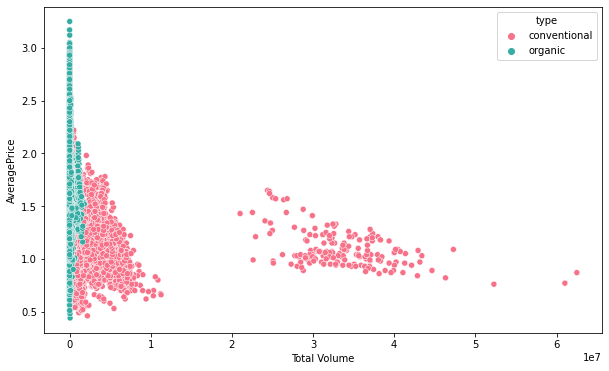

In [207]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=df,palette="husl")
plt.show()

The scatter plot gives the relationship between the total volume and average price on the basis of type. All organic type of avocado is lies in the volume zero and the average price is high for organic. The conventional type avocado has total volume 0-4 with the Average price upto 2.3. So the Average Price of the oraganic type with zero volume is more than the conventional type.

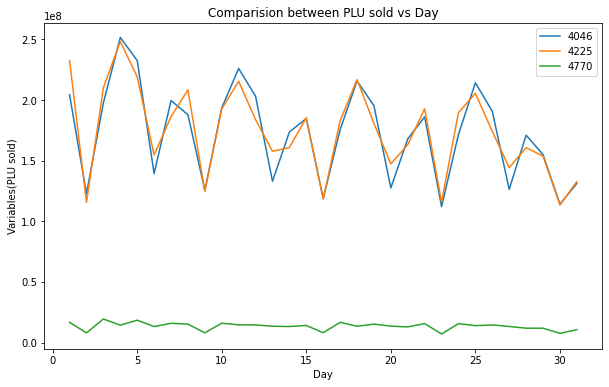

In [209]:
variables = df[['4046', '4225', '4770']].groupby(df.Day).sum()
variables.plot(kind='line', fontsize=10,figsize=(10,6))
plt.title("Comparision between PLU sold vs Day")
plt.xlabel("Day")
plt.ylabel("Variables(PLU sold)")
plt.show()

From the line plot we can observe how the total number of avocados with PLU 4046, PLU 4225 and PLU 4770 are sold in each day starting from day 1 to day 31. We can notice very few avocados with 4046 was sold in all the day and the avocados with PLU 4225 and PLU 4770 was sold all time high.

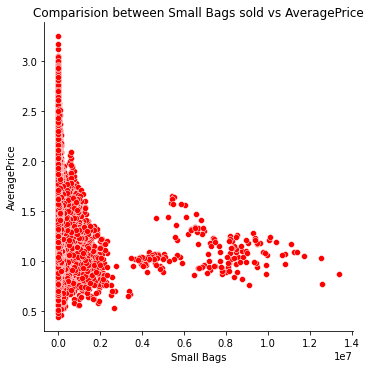

In [210]:
sns.relplot(df['Small Bags'],df['AveragePrice'],color="r");
plt.title("Comparision between Small Bags sold vs AveragePrice")
plt.xlabel("Small Bags")
plt.ylabel("AveragePrice")
plt.show()

The Small Bags size has high average price at first and also from the range 0-0.6, the price of small bag type is almost 1.6.

## Multivariate Analysis

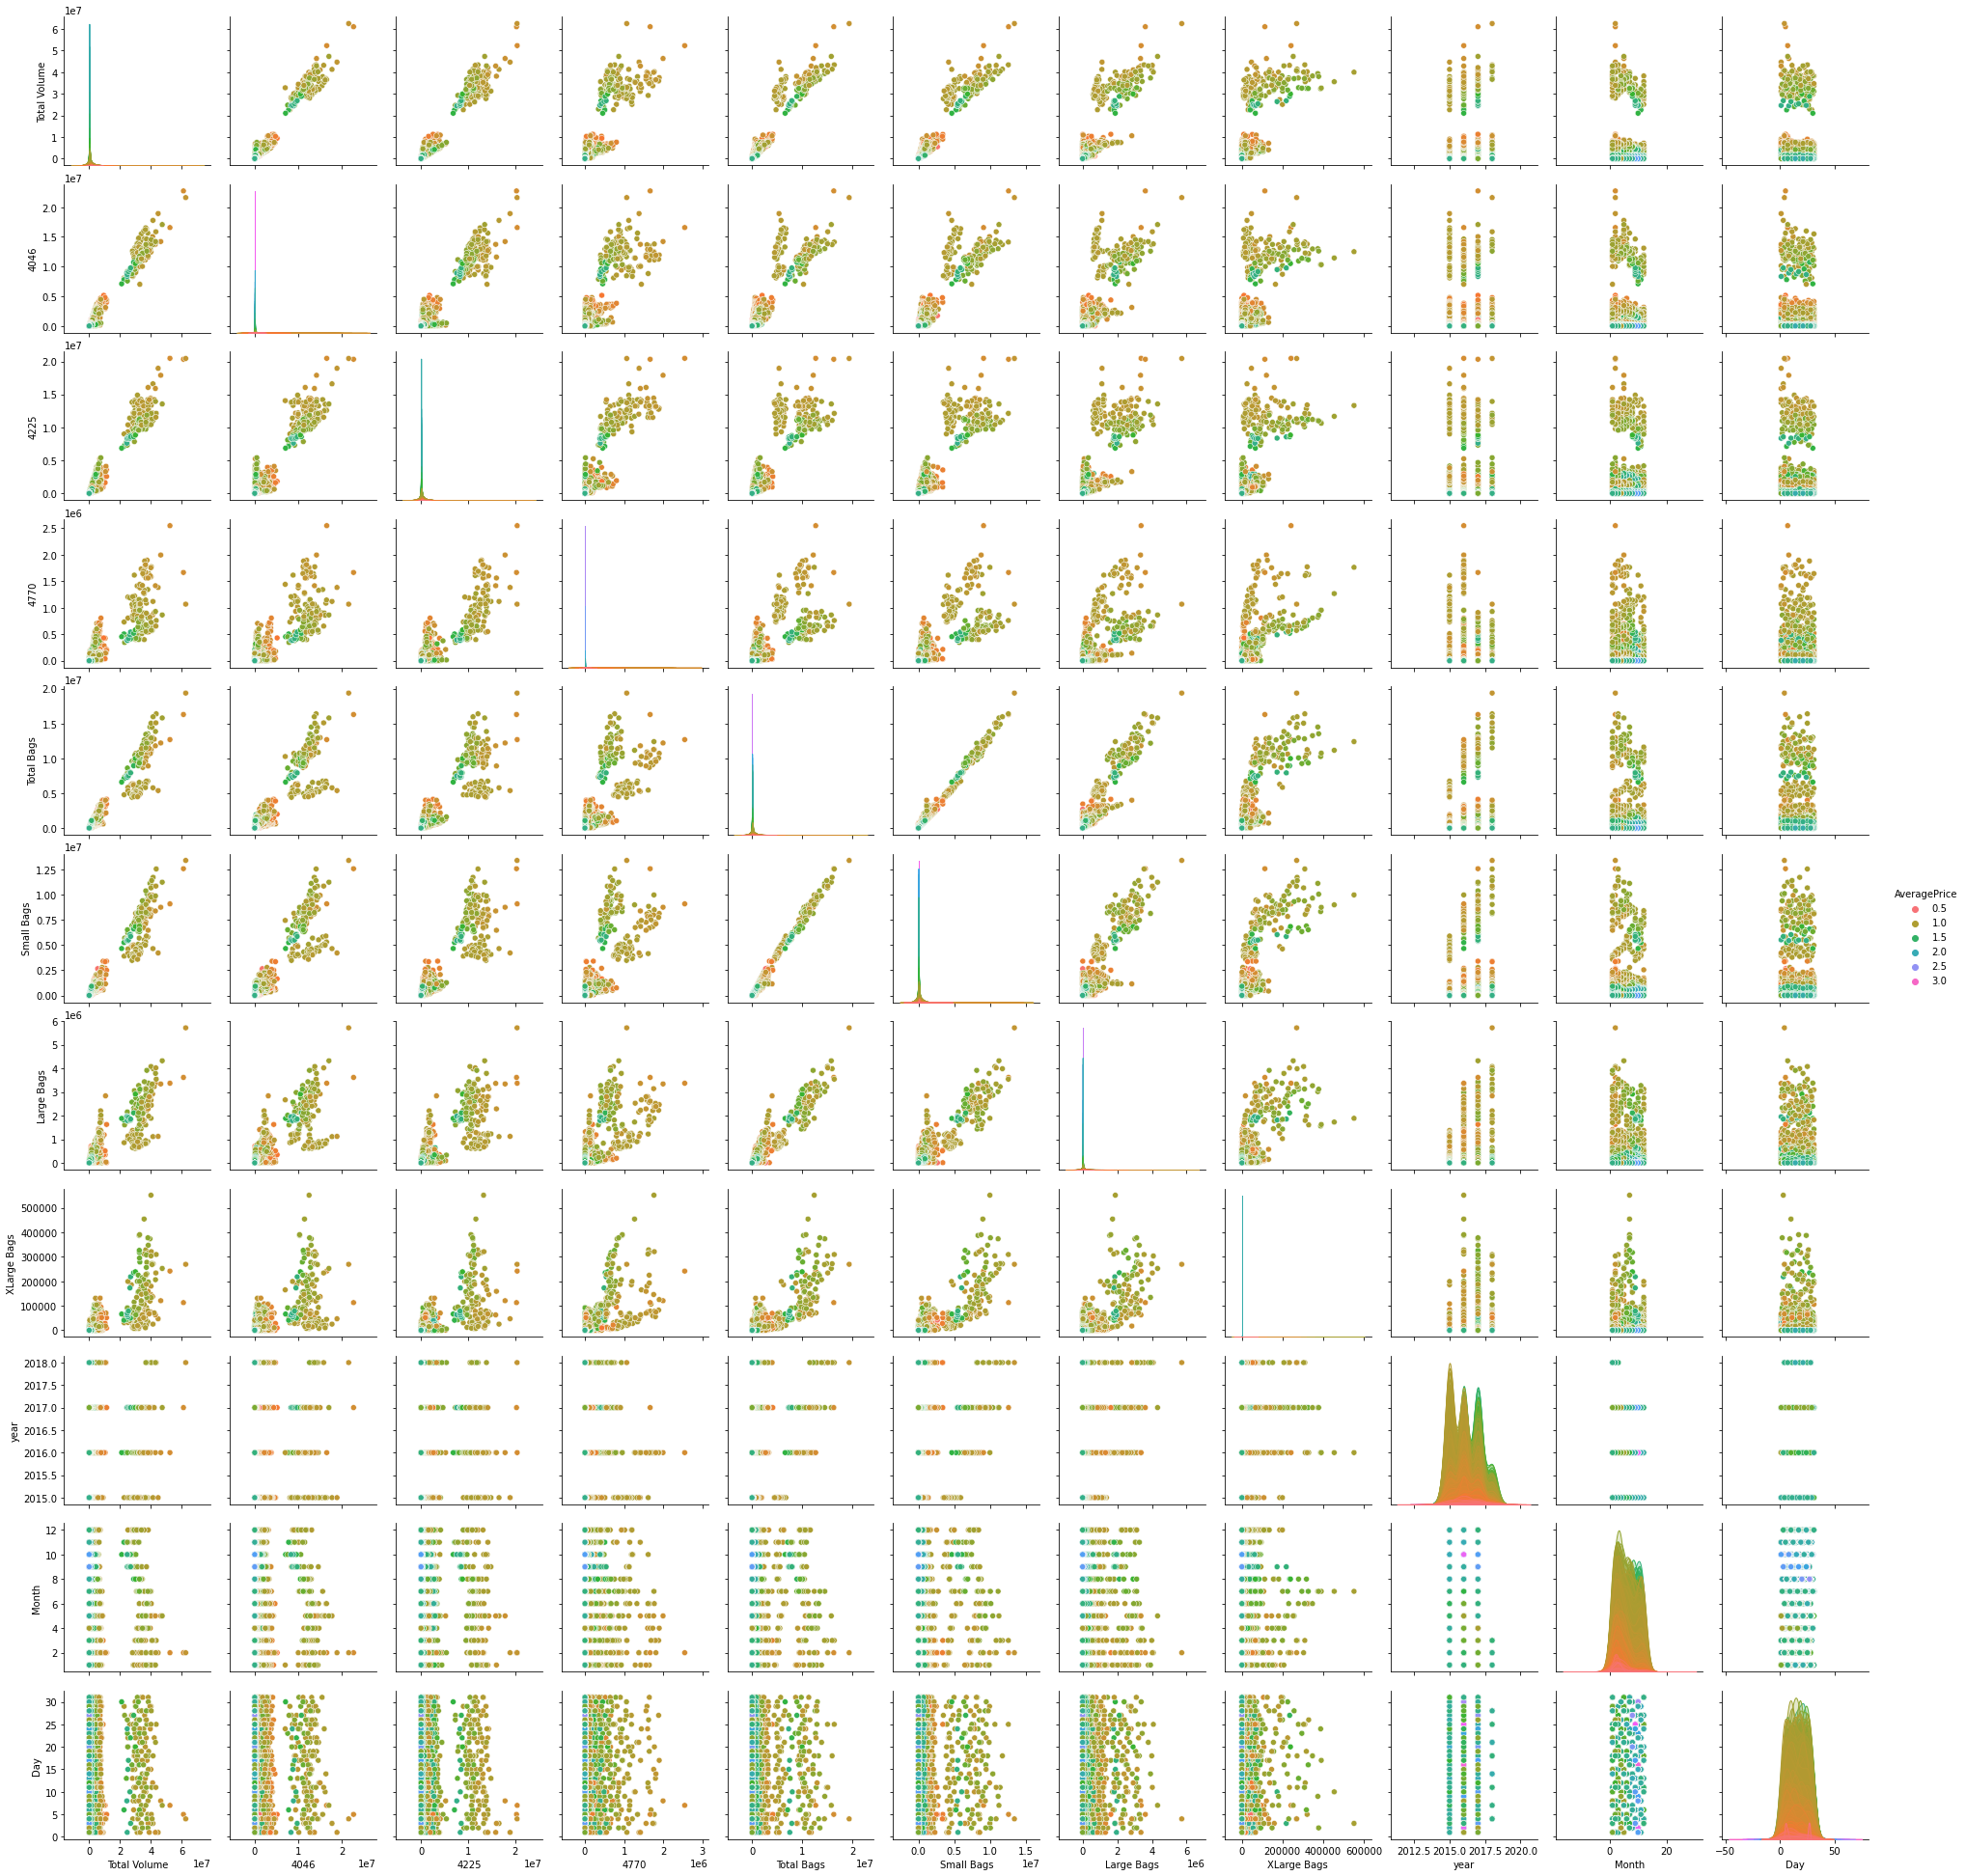

In [211]:
sns.pairplot(df,hue="AveragePrice",palette="husl")

## Identifying the outliers

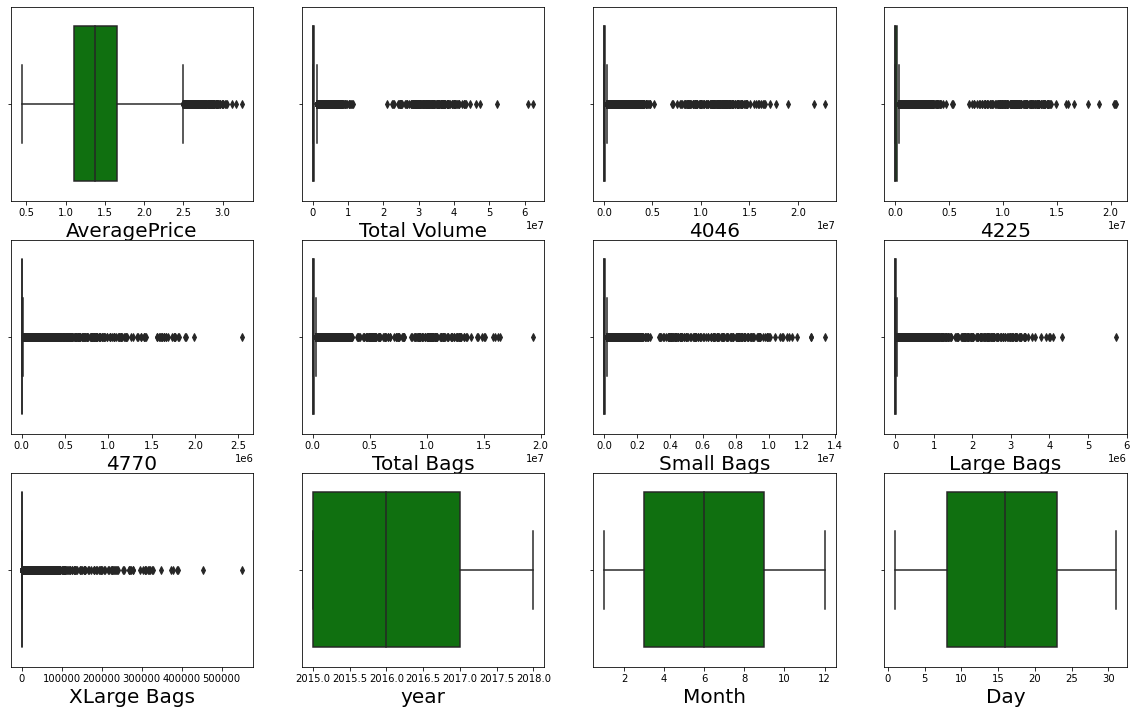

In [308]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The outliers present in all the columns except year, Month and Day. Let's remove the outliers using Zscore method. Even AveragePrice has outliers, since it is our target variable I will keep it untouched.

## Removing outliers

## i) Zscore method

In [405]:
# Features containing outliers
fea = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]

In [406]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(fea))

z

array([[0.22771641, 0.23081597, 0.1999022 , ..., 0.2326465 , 0.22235202,
        0.17557961],
       [0.23042664, 0.23110251, 0.20805446, ..., 0.23156838, 0.22233464,
        0.17557961],
       [0.21208462, 0.23100731, 0.1544779 , ..., 0.23339891, 0.22231148,
        0.17557961],
       ...,
       [0.24233073, 0.2306933 , 0.24309014, ..., 0.23164379, 0.22256082,
        0.17557961],
       [0.24162464, 0.2304279 , 0.24265143, ..., 0.22954271, 0.2225293 ,
        0.17557961],
       [0.24125273, 0.22934712, 0.24317042, ..., 0.22811058, 0.22262764,
        0.17557961]])

In [407]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  Month  Day  
0                Albany     12   27  
1                Albany     12   20  
2                Albany     12   13  
3                Albany     12    6  
4                Albany     11   29  
...                 ...    ...  ...  
18244  WestTexNewMexico      2    4  
18245  WestTexNewMexico      1   28  
18246  WestTexNewMexico      1   21  
18247  WestTexNewMexico      1   14  
18248  WestTexNewMexico      1    7  

[17782 rows x 14 columns]

In [408]:
# Shape of original dataset
df.shape

(18249, 14)

Before removing the outliers we had 18249 rows and 14 columns in our dataset.

In [409]:
# Shape of new dataframe
df_new.shape

(17782, 14)

After removing the outliers we have 17782 rows and 14 columns.

In [410]:
# Checking the the data loss
data_loss = (18249-17782)/18249*100
data_loss

2.55904433119623

## ii) IQR (Inter Quantile Range) method

In [411]:
# 1st quantile
Q1=fea.quantile(0.25)

# 3rd quantile
Q3=fea.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [412]:
# Let's check the dataloss
data_loss = (18249-11747)/18249*100
data_loss

35.62934955340019

Using IQR method I am losing more data. So let's consider Zscore method only.

## Checking for skewness

In [413]:
# Checking the skewness
df_new.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

## Removing skewness using yeo-johnson method

In [414]:
# Removing skewness using yeo-johnson method to get better prediction
fea = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [415]:
df_new[fea] = scaler.fit_transform(df_new[fea].values)
df_new[fea].head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  
0   -0.775214    -0.675702  
1   -0.765237    -0.675702  
2   -0.752534    -0.675702  
3   -0.693012    -0.675702  
4   -0.600755    -0.675702

In [416]:
# Checking skewness after using yeo=johnson ethod
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [417]:
# Removing skewness using log transformation
df_new["XLarge Bags"] = np.log1p(df_new["XLarge Bags"])

The skewness has been removed, now let's check it.

In [418]:
# Let's check the skewness again
df_new.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

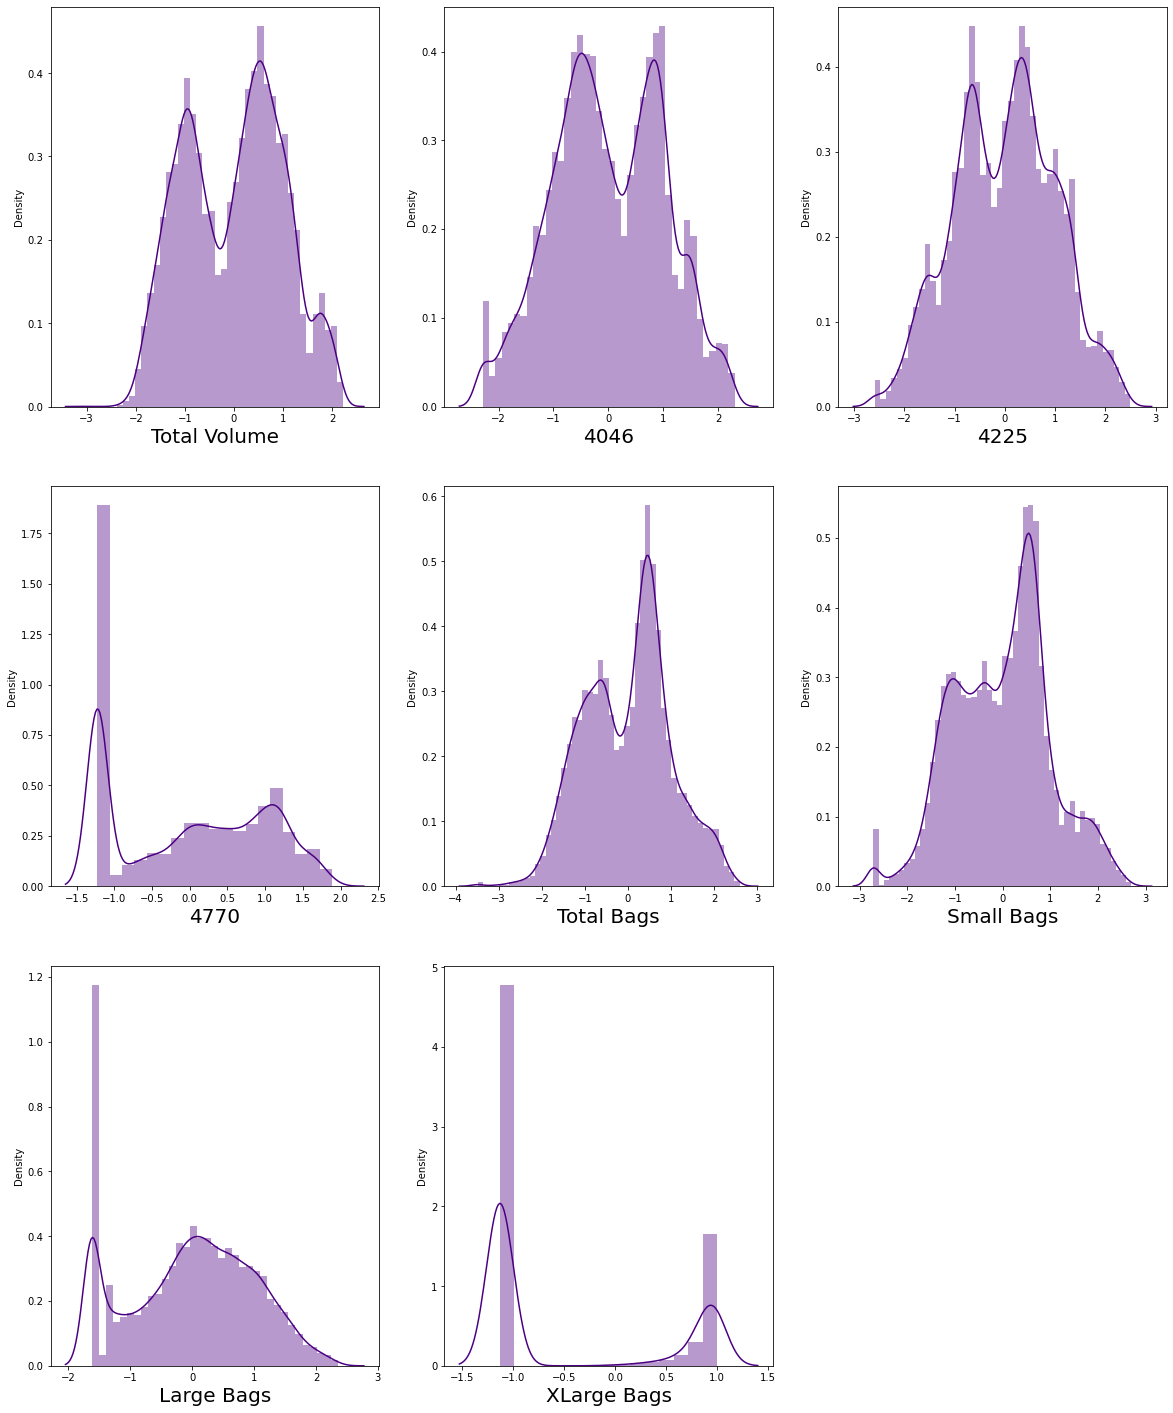

In [419]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_new[fea]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df_new[column],color='indigo')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Encoding the categorical columns using Label Encoding

In [420]:
categorical_col = ["type","region"]

In [421]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df_new[categorical_col]= df_new[categorical_col].apply(LE.fit_transform)

In [422]:
df_new[categorical_col]

type  region
0         0       0
1         0       0
2         0       0
3         0       0
4         0       0
...     ...     ...
18244     1      53
18245     1      53
18246     1      53
18247     1      53
18248     1      53

[17782 rows x 2 columns]

# Correlation between the target variable and independent variables using HEAT map

In [423]:
cor=df_new.corr()
cor

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.576829 -0.548618 -0.448579 -0.491320   
Total Volume     -0.576829      1.000000  0.889083  0.924160  0.818568   
4046             -0.548618      0.889083  1.000000  0.764679  0.736523   
4225             -0.448579      0.924160  0.764679  1.000000  0.796799   
4770             -0.491320      0.818568  0.736523  0.796799  1.000000   
Total Bags       -0.564616      0.939776  0.799354  0.818511  0.761641   
Small Bags       -0.493621      0.905098  0.778765  0.784901  0.754305   
Large Bags       -0.477879      0.681427  0.601899  0.614878  0.548457   
XLarge Bags      -0.392262      0.629752  0.575152  0.583293  0.617192   
type              0.608447     -0.800828 -0.725826 -0.747722 -0.780988   
year              0.099910      0.076584 -0.002396 -0.004533 -0.051657   
region            0.010428      0.065709  0.159390  0.032273  0.037805   
Month             0.157900     -0.026332 -0.025919 -0.024708 -0.017377   
Day               0.024742     -0.006248 -0.004558 -0.005919  0.001383   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.564616   -0.493621   -0.477879    -0.392262  0.608447   
Total Volume    0.939776    0.905098    0.681427     0.629752 -0.800828   
4046            0.799354    0.778765    0.601899     0.575152 -0.725826   
4225            0.818511    0.784901    0.614878     0.583293 -0.747722   
4770            0.761641    0.754305    0.548457     0.617192 -0.780988   
Total Bags      1.000000    0.949901    0.729652     0.612530 -0.725686   
Small Bags      0.949901    1.000000    0.566307     0.601404 -0.720466   
Large Bags      0.729652    0.566307    1.000000     0.451796 -0.500026   
XLarge Bags     0.612530    0.601404    0.451796     1.000000 -0.672461   
type           -0.725686   -0.720466   -0.500026    -0.672461  1.000000   
year            0.210924    0.185955    0.190295     0.156202  0.007399   
region          0.065996    0.051985    0.086573    -0.017598  0.021970   
Month          -0.014571   -0.010260   -0.016942     0.020885 -0.005044   
Day            -0.003703   -0.000535   -0.000876     0.010991 -0.002469   

                  year    region     Month       Day  
AveragePrice  0.099910  0.010428  0.157900  0.024742  
Total Volume  0.076584  0.065709 -0.026332 -0.006248  
4046         -0.002396  0.159390 -0.025919 -0.004558  
4225         -0.004533  0.032273 -0.024708 -0.005919  
4770         -0.051657  0.037805 -0.017377  0.001383  
Total Bags    0.210924  0.065996 -0.014571 -0.003703  
Small Bags    0.185955  0.051985 -0.010260 -0.000535  
Large Bags    0.190295  0.086573 -0.016942 -0.000876  
XLarge Bags   0.156202 -0.017598  0.020885  0.010991  
type          0.007399  0.021970 -0.005044 -0.002469  
year          1.000000 -0.003610 -0.173166  0.004044  
region       -0.003610  1.000000  0.002175  0.000751  
Month        -0.173166  0.002175  1.000000  0.010456  
Day           0.004044  0.000751  0.010456  1.000000

Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

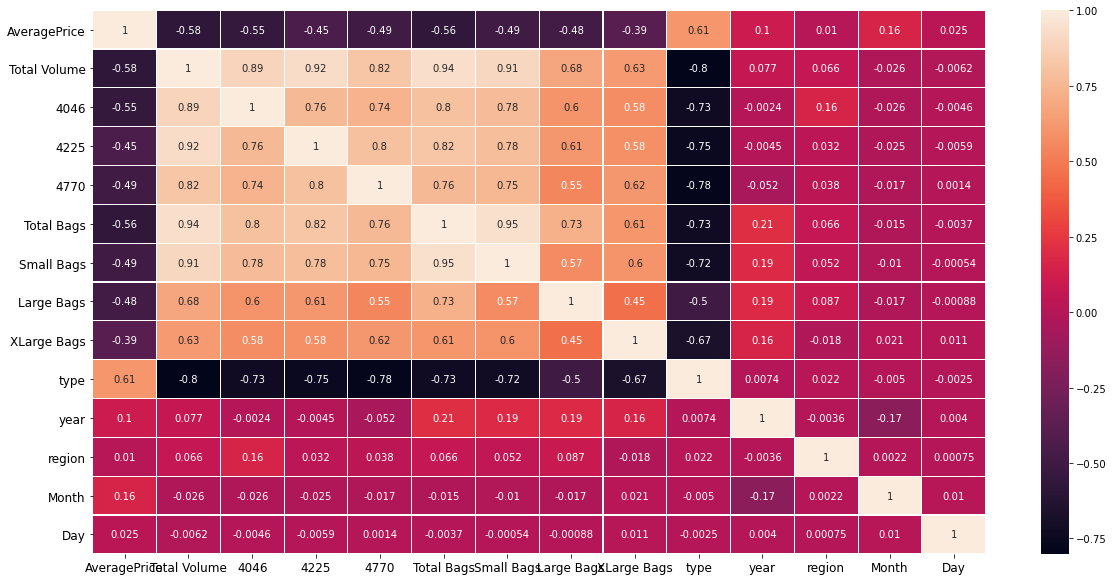

In [424]:
plt.figure(figsize=(20,10))
sns.heatmap(df_new.corr(),linewidths=.1,annot=True)
plt.yticks(rotation=0,fontsize=12);
plt.xticks(rotation=0,fontsize=12);

By looks into the heat map these are my observations on independent features.

* Total Bags and Small Bags are highly correlated with each other.
* Total Volume and Small Bags are highly correlated with each other.
* Total Volume and Total Bags are highly correlated with each other.
* Total Volume and 4225 are highly correlated with each other.

In [425]:
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
Month           0.157900
year            0.099910
Day             0.024742
region          0.010428
XLarge Bags    -0.392262
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

## Visualizing the correlation between label and features using bar plot

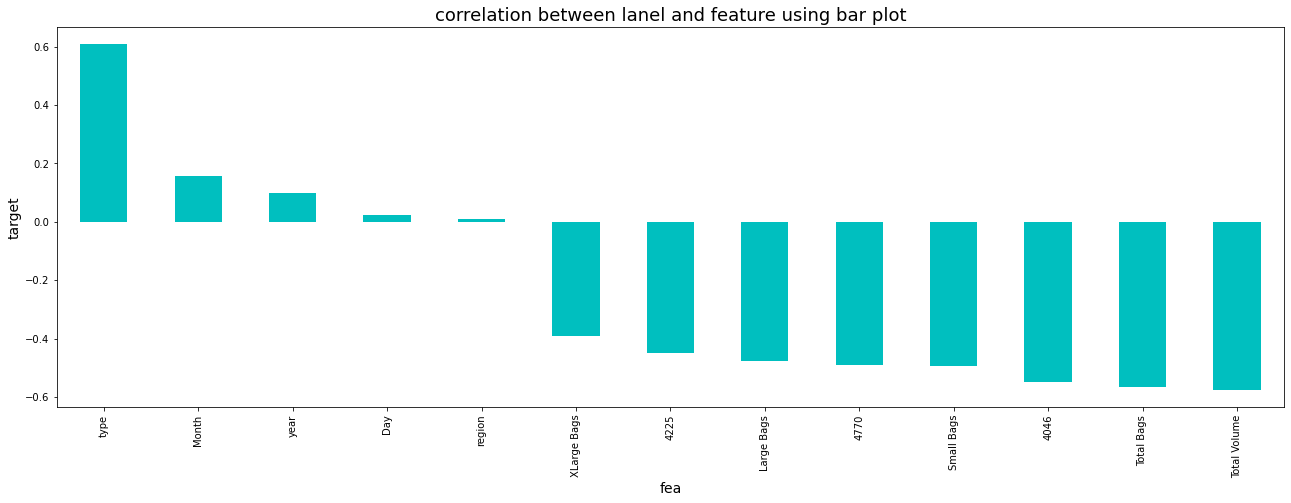

In [426]:
plt.figure(figsize=(22,7))
df_new.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='c')
plt.xlabel('fea',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

The features region and Day have very less correlation with the target so we can drop these columns.

In [427]:
# Dropping irrelevant columns
df_new.drop("region",axis=1, inplace=True)
df_new.drop("Day",axis=1, inplace=True)

In [428]:
df_new.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   
1          1.35     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   
2          0.93      0.215503 -0.724508  0.656010  0.034215   -0.556204   
3          1.08      0.029840 -0.625017  0.475615 -0.110976   -0.702370   
4          1.28     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   

   Small Bags  Large Bags  XLarge Bags  type  year  Month  
0   -0.337064   -0.775214    -1.126094     0  2015     12  
1   -0.301038   -0.765237    -1.126094     0  2015     12  
2   -0.364044   -0.752534    -1.126094     0  2015     12  
3   -0.500341   -0.693012    -1.126094     0  2015     12  
4   -0.479918   -0.600755    -1.126094     0  2015     11

## Separating the features and label variables into x and y

In [429]:
x = df_new.drop("AveragePrice", axis=1)
y = df_new["AveragePrice"]

In [430]:
x.shape

(17782, 11)

In [431]:
y.shape

(17782,)

In [432]:
x.head()

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0     -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1     -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2      0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3      0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4     -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   

   Large Bags  XLarge Bags  type  year  Month  
0   -0.775214    -1.126094     0  2015     12  
1   -0.765237    -1.126094     0  2015     12  
2   -0.752534    -1.126094     0  2015     12  
3   -0.693012    -1.126094     0  2015     12  
4   -0.600755    -1.126094     0  2015     11

## Standard Scalarization

In [433]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0         -0.065094 -0.649918  0.358278 -0.212550   -0.527445   -0.337064   
1         -0.137269 -0.770067  0.276355 -0.165117   -0.488205   -0.301038   
2          0.215503 -0.724508  0.656010  0.034215   -0.556204   -0.364044   
3          0.029840 -0.625017  0.475615 -0.110976   -0.702370   -0.500341   
4         -0.170456 -0.677083  0.268966 -0.100289   -0.675712   -0.479918   
...             ...       ...       ...       ...         ...         ...   
17777     -0.668931 -0.454078 -0.922232 -1.224990   -0.331042   -0.165765   
17778     -0.762380 -0.610403 -0.665649 -1.224990   -0.499550   -0.321645   
17779     -0.766344 -0.610350 -0.774395  0.455355   -0.493424   -0.303466   
17780     -0.692595 -0.539211 -0.711605  0.455045   -0.424475   -0.240252   
17781     -0.658062 -0.351503 -0.787209  0.168008   -0.383676   -0.201685   

       Large Bags  XLarge Bags      type      year     Month  
0       -0.775214    -0.685946 -1.026443 -1.214908  1.641434  
1       -0.765237    -0.685946 -1.026443 -1.214908  1.641434  
2       -0.752534    -0.685946 -1.026443 -1.214908  1.641434  
3       -0.693012    -0.685946 -1.026443 -1.214908  1.641434  
4       -0.600755    -0.685946 -1.026443 -1.214908  1.358706  
...           ...          ...       ...       ...       ...  
17777   -0.405895    -0.685946  0.974238  1.979143 -1.185845  
17778   -0.478556    -0.685946  0.974238  1.979143 -1.468572  
17779   -0.945246    -0.685946  0.974238  1.979143 -1.468572  
17780   -0.910471    -0.685946  0.974238  1.979143 -1.468572  
17781   -1.042930    -0.685946  0.974238  1.979143 -1.468572  

[17782 rows x 11 columns]

## Checking VIF values to solve multicollinearity

In [435]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["fea"] = x.columns

# Let's check the values
vif

VIF values           fea
0    51.806476  Total Volume
1     6.808776          4046
2    11.158951          4225
3     3.951861          4770
4    34.441003    Total Bags
5    16.630696    Small Bags
6     3.462408    Large Bags
7     2.065369   XLarge Bags
8     3.720176          type
9     1.386160          year
10    1.053985         Month

The VIF value is more than 10 in the features Total Volume, 4225, Total Bags, Small Bags and Large Bags. First I will remove the column having high VIF value and will check the VIF again, if the value retains more than 10 then I will drop the specific column again.

In [436]:
# Dropping the feature Total Volume
x.drop("Total Volume",axis=1, inplace=True)

In [437]:
# Againing checking the VIF after removing one column

vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["fea"] = x.columns

# Let's check the values
vif

VIF values          fea
0    3.546068         4046
1    4.272321         4225
2    3.936681         4770
3   24.479948   Total Bags
4   16.630524   Small Bags
5    3.419283   Large Bags
6    2.053729  XLarge Bags
7    3.487456         type
8    1.383630         year
9    1.051817        Month

The multocollinearity problem still exists so let's drop the feature Total Bags which has VIF value more than 10.

In [438]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [439]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["fea"] = x.columns

# Let's check the values
vif

VIF values          fea
0    3.527072         4046
1    4.127765         4225
2    3.936426         4770
3    4.098464   Small Bags
4    1.864199   Large Bags
5    2.053482  XLarge Bags
6    3.484298         type
7    1.359151         year
8    1.051183        Month

The VIF value is less than 10 in all the features which means we have solved the multicollinearity problem. Now we can move to model building.

In [440]:
# DataFrame after preprocessing and data cleaning
x.head()

4046      4225      4770  Small Bags  Large Bags  XLarge Bags  \
0 -0.649918  0.358278 -0.212550   -0.337064   -0.775214    -0.685946   
1 -0.770067  0.276355 -0.165117   -0.301038   -0.765237    -0.685946   
2 -0.724508  0.656010  0.034215   -0.364044   -0.752534    -0.685946   
3 -0.625017  0.475615 -0.110976   -0.500341   -0.693012    -0.685946   
4 -0.677083  0.268966 -0.100289   -0.479918   -0.600755    -0.685946   

       type      year     Month  
0 -1.026443 -1.214908  1.641434  
1 -1.026443 -1.214908  1.641434  
2 -1.026443 -1.214908  1.641434  
3 -1.026443 -1.214908  1.641434  
4 -1.026443 -1.214908  1.358706

# Finding best random state

In [441]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [442]:
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8666077410567096  on Random_state  3


I am getting maximum R2 score 86% on the basis of Random state 3.

## Creating new train test split

In [443]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Regression Algorithms

In [444]:
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

## Random Forest Regressor

In [448]:
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.8721551412516152
MAE: 0.10114650421743202
MSE: 0.020930075160262417
RMSE: 0.1446723026714596
Cross_Validaton_Score 0.20511081114920468


## Support Vector Machine Regressor

In [447]:
# Checking R2 score for Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)

# prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('MAE:',metrics.mean_absolute_error(y_test, predsvr))
print('MSE:',metrics.mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.777355927488341
MAE: 0.14010159793299823
MSE: 0.0364500944134745
RMSE: 0.19091907818097828
Cross_Validaton_Score 0.18236483729214195


## Linear Regression

In [449]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',metrics.mean_absolute_error(y_test, predLR))
print('MSE:',metrics.mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.509066246127855
MAE: 0.21991349628506926
MSE: 0.08037304329520865
RMSE: 0.28350139910626304
Cross_Validaton_Score 0.09294620763838561


## Stochastic Gradient Descent Regressor

In [450]:
# Checking R2 score for Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(y_test, predSGD))
print('MSE:',metrics.mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predSGD)))

# Checking cv score for Stochastic Gradient Descent Regressor
print("Cross_Validaton_Score",cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.5091948878598025
MAE: 0.2201354019008931
MSE: 0.08035198276023864
RMSE: 0.28346425305536965
Cross_Validaton_Score 0.08137209921094224


## GradientBoosting Regressor

In [452]:
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.7238190211561438
MAE: 0.1611634725807183
MSE: 0.04521486981665413
RMSE: 0.2126378842460913
Cross_Validaton_Score 0.3524335257953576


## KNeighbors Regressor

In [453]:
# Checking R2 score for KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

# Checking cv score for KNN
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.8666077410567096
MAE: 0.10409109653233364
MSE: 0.02183826579194002
RMSE: 0.14777775810973728
Cross_Validaton_Score 0.07961153938476018


From the difference between R2 score and Cross Validation Score we can conclude that KNeighbors Regressor as our best fittg model.

# Hyperparameter Tuning

In [454]:
from sklearn.model_selection import GridSearchCV

In [455]:
#KNeighbors Regressor
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance']}

In [456]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [457]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [458]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'distance'}

This gives the best parameter value.

In [459]:
avocado =KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avocado.fit(x_train, y_train)
pred = avocado.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.1446723026714596
R2_Score: 88.33347962936709


After tuning the R2 score of the model is increasing and is giving 88% which is good.

# Saving the model

In [460]:
# Saving the model using .pkl
import joblib
joblib.dump(avocado,"Avocado.pkl")

['Avocado.pkl']

I have saved my model using .pkl.

# Predicting the saved model

In [461]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Avocado.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1.27665263, 1.73808167, 1.67531857, ..., 1.18120113, 1.77959254,
       0.95603886])

These are the predicted average price of the avocado.

In [462]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0         1         2        3         4         5        6     \
Predicted  1.276653  1.738082  1.675319  1.47726  1.585465  2.188334  1.37051   
Original   1.340000  1.680000  1.810000  1.52000  1.620000  2.200000  1.33000   

               7        8         9     ...      5325      5326      5327  \
Predicted  1.342399  1.92992  1.076814  ...  1.882442  1.554426  1.401968   
Original   1.180000  2.02000  1.080000  ...  1.850000  1.370000  1.270000   

               5328      5329      5330    5331      5332      5333      5334  
Predicted  0.817807  1.897282  1.324965  1.5568  1.181201  1.779593  0.956039  
Original   0.790000  2.060000  1.260000  1.6300  0.770000  1.840000  0.860000  

[2 rows x 5335 columns]

We can observe both original and predicted values are almost same.